<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/estudos_de_python_em_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
#@markdown RENDERIZAÇÃO DE GRAFICOS

meio = 'png' #@param ['svg', 'colab' , 'jpg' , 'png']

if meio != 'colab' :
    try:
        import kaleido
    except:
        !pip install -U kaleido
        import kaleido


import plotly.io
# 0 @ markdown uso o 'svg/jpg' pra enviar para o github,
# @ markdown porem perde o modo interativo do plotly
plotly.io.renderers.default = meio


In [114]:
# @# markdown codigo é o ticker na B3. Data é ano/mes/dia.

codigo  = 'itsa4'       #@param {type:"string"}
inicio  = '2007-01-28'  #@param {type:"date"}
termino = '2023-08-08'  #@param {type:"date"}


usar_periodo = True #@param {type:"boolean"}
if usar_periodo :
  periodo = 'max' #@param ['1d','5d','1mo','3mo','6mo','1y','2y','3y','5y','10y','ytd','max']
#else: #periodo em anos
#  periodo = ((datetime.strptime(termino,'%Y-%m-%d') - datetime.strptime(inicio,'%Y-%m-%d')).days)/365
codigo = codigo.upper()

In [115]:
#@markdown Importação do pacotes do python

import warnings
warnings.filterwarnings('ignore')

##import datetime
from datetime import datetime
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

!pip install -q googletrans==4.0.0rc1
from googletrans import Translator
translator = Translator()
from google.colab import data_table

# try:
#   import yfinance as yf
# except:
!pip install -q yfinance --upgrade --no-cache
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## sns
import seaborn as sns

## plotly
import plotly.graph_objs as go
from plotly.offline import iplot

## cufflinks connects plotly with pandas to create graphs and charts
## of dataframes directly
import cufflinks as cf
cf.go_offline()

import textwrap
from IPython.display import clear_output
clear_output()



In [116]:
#@markdown A empresa e Indicadores fundamentalistas via fundamentus.com.br

tk_info = yf.Ticker(codigo+".sa")
info = tk_info.get_info()
# info
L52 = info['fiftyTwoWeekLow']
H52 = info['fiftyTwoWeekHigh']
HP = info['targetHighPrice']
LP = info['targetLowPrice']
MP = info['targetMeanPrice']
mP = info['targetMedianPrice']
rec = translator.translate(info['recommendationKey'], dest='pt').text
nAnal = info['numberOfAnalystOpinions']
message = (
     f"\n\n\n De acordo com o yahoo finance, dentre {nAnal} analistas, "
     f"o menor preço-alvo é {LP}, "
     f"o maior {HP},"
     f"o preço alvo médio é {MP}, a mediana {mP}. "
     f'A recomentação é "{rec}".'
     f'Nas últimas 52 semanas o maior preço foi {H52} e o menor {L52}.'
)

print(codigo)
print("\n".join(textwrap.wrap(translator.translate(info['longBusinessSummary'], dest='pt').text,118)))

print("\n".join(textwrap.wrap(message,118)))

import requests
#pra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

url = 'https://www.fundamentus.com.br/resultado.php'


#junta com a requests
r = requests.get(url, headers=header)
# read_html do pandas põe a tabela num dataframe
funds = pd.read_html(r.text, decimal=',', thousands='.',encoding='ISO-8859-1')
dfunds = pd.DataFrame(funds[0])

(dfunds.loc[dfunds['Papel']==codigo]).set_index('Papel')

ITSA4
Itaúsa S.A., por meio de suas subsidiárias, opera nos mercados financeiros e industriais no Brasil e
internacionalmente.A empresa oferece produtos de crédito e outros serviços financeiros a indivíduos e clientes
corporativos.Ele também fabrica e vende calçados, vestuário e itens têxteis e componentes relacionados, além de couro,
resina e artigos naturais ou artificiais.Além disso, a empresa se envolve no transporte de gás através de gasodutos
para empresas de distribuição, bem como serviços de saneamento privados.Além disso, fabrica e vende acessórios,
acessórios e chuveiros;Tilhas de cerâmica, incluindo revestimentos de piso e parede sob as marcas CEUSA, Portinari e
Castelatto;e painéis de madeira de pinheiro e eucalipto usados principalmente na fabricação de painéis de madeira de
média e alta densidade sob a marca DuringX e Durafloor.A empresa era anteriormente conhecida como ItaUsa -
Investimentos Itaú SA.Itaúsa S.A. foi incorporado em 1966 e está sediado em São Paulo, Brasil.

,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
Papel,,,,,,,,,,,,,,,,,,,,
ITSA4,9.9,6.96,1.2,12.953,"6,98%",0.934,19.28,105.78,-15.21,108.89,50.96,"12,25%","193,30%",1.65,"0,97%","17,31%",186165000.0,7.973800e+10,0.14,"14,42%"


In [117]:
#@markdown A empresa e Indicadores fundamentalistas via statusinvest.com.br (pode ter atraso)

pd.set_option('display.max_columns', None)


fundsSI = pd.read_csv('https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/statusinvest-busca-avancada.csv',
                      sep=';' , decimal=',' ,thousands ='.' )
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')

,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
TICKER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ITSA4,9.94,6.95,6.98,1.21,0.94,33.55,205.76,186.19,6.32,6.53,0.19,0.04,13.01,19.36,-1.07,1.65,17.31,13.43,15.74,0.78,0.18,0.07,11.3,11.13,1.818977e+08,8.22,1.42,-1.53,9.676540e+10


In [118]:
trimestre=tk_info.quarterly_financials
k=[]
v=[]
for i in trimestre.index:
    #print(i)
    k.append(i)
    #print(translator.translate(i, dest='pt').text)
    v.append(translator.translate(i, dest='pt').text)
trad = dict(zip(k, v))

In [119]:
trimestre.rename(index=trad)


,2023-09-30,2023-03-31,2022-12-31,2022-09-30
Efeito tributário de itens incomuns,-352000.0,13200000.0,87927132.210875,8323000.0
Taxa de imposto para os calcs,0.016,0.4,0.044162,0.029
Ebitda normalizada,4792000000.0,3540000000.0,3289000000.0,3876000000.0
Itens totais incomuns,-22000000.0,33000000.0,1991000000.0,287000000.0
Itens incomuns totais excluindo a boa vontade,-22000000.0,33000000.0,1991000000.0,287000000.0
Lucro líquido da operação contínua juros minoritários líquidos,4091000000.0,2798000000.0,3324000000.0,3555000000.0
Depreciação reconciliada,20000000.0,259000000.0,229000000.0,401000000.0
Custo de receita reconciliado,1238000000.0,1048000000.0,NaN,NaN
Ebitda,4770000000.0,3573000000.0,5280000000.0,4163000000.0
EBIT,4750000000.0,3314000000.0,5051000000.0,3762000000.0


In [120]:
#@markdown Empresas do mesmo setor
def get_setor_data(setor=None):

    url = 'http://www.fundamentus.com.br/resultado.php?setor={}'.format(setor)
    content = requests.get(url, headers=header)
    df = pd.read_html(content.text, decimal=",", thousands='.')[0]
    return list(df['Papel'])

def list_setor():
    from tabulate import tabulate
    print( tabulate(df, headers=['label','desc','id'], tablefmt='presto') )
    return None

setores = [ 1 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 2 ,
    20 , 21 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 3 , 30 , 31
    , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 4 , 40 , 41 , 42 , 43 , 5
    , 6 , 7 , 8 , 9 ]

## Setores:
setor = [
   [ 'agro'            , 'Agropecuária'                       , 42 ] ,
   [ 'saneamento'      , 'Água e Saneamento'                  , 33 ] ,
   [ 'alimentos'       , 'Alimentos'                          , 15 ] ,
   [ 'bebidas'         , 'Bebidas'                            , 16 ] ,
   [ 'com1'            , 'Comércio'                           , 27 ] ,
   [ 'com2'            , 'Comércio'                           , 12 ] ,
   [ 'com3'            , 'Comércio e Distribuição'            , 20 ] ,
   [ 'computadores'    , 'Computadores e Equipamentos'        , 28 ] ,
   [ 'construcao'      , 'Construção e Engenharia'            , 13 ] ,
   [ 'engenharia'      , 'Construção e Engenharia'            , 13 ] ,
   [ 'diversos'        , 'Diversos'                           , 26 ] ,
   [ 'embalagens'      , 'Embalagens'                         , 6  ] ,
   [ 'energia'         , 'Energia Elétrica'                   , 32 ] ,
   [ 'equipamentos'    , 'Equipamentos Elétricos'             , 9  ] ,
   [ 'imoveis'         , 'Exploração de Imóveis'              , 39 ] ,
   [ 'financeiro'      , 'Financeiros'                        , 35 ] ,
   [ 'fumo'            , 'Fumo'                               , 17 ] ,
   [ 'gas'             , 'Gás'                                , 34 ] ,
   [ 'holdings'        , 'Holdings Diversificadas'            , 40 ] ,
   [ 'hoteis'          , 'Hoteis e Restaurantes'              , 24 ] ,
   [ 'restaurantes'    , 'Hoteis e Restaurantes'              , 24 ] ,
   [ 'papel'           , 'Madeira e Papel'                    , 5  ] ,
   [ 'maquinas'        , 'Máquinas e Equipamentos'            , 10 ] ,
   [ 'materiais'       , 'Materiais Diversos'                 , 7  ] ,
   [ 'transporte'      , 'Material de Transporte'             , 8  ] ,
   [ 'midia'           , 'Mídia'                              , 23 ] ,
   [ 'mineracao'       , 'Mineração'                          , 2  ] ,
   [ 'outros'          , 'Outros'                             , 41 ] ,
   [ 'petroleo'        , 'Petróleo, Gás e Biocombustíveis'    , 1  ] ,
   [ 'previdencia'     , 'Previdência e Seguros'              , 38 ] ,
   [ 'seguros'         , 'Previdência e Seguros'              , 38 ] ,
   [ 'usopessoal'      , 'Prods. de Uso Pessoal e de Limpeza' , 18 ] ,
   [ 'limpeza'         , 'Prods. de Uso Pessoal e de Limpeza' , 18 ] ,
   [ 'programas'       , 'Programas e Serviços'               , 29 ] ,
   [ 'quimicos'        , 'Químicos'                           , 4  ] ,
   [ 'saude'           , 'Saúde'                              , 19 ] ,
   [ 'securitizadoras' , 'Securitizadoras de Recebíveis'      , 36 ] ,
   [ 'servicos'        , 'Serviços'                           , 11 ] ,
   [ 'finandiversos'   , 'Serviços Financeiros Diversos'      , 37 ] ,
   [ 'siderurgia'      , 'Siderurgia e Metalurgia'            , 3  ] ,
   [ 'tecidos'         , 'Tecidos, Vestuário e Calçados'      , 21 ] ,
   [ 'vestuario'       , 'Tecidos, Vestuário e Calçados'      , 21 ] ,
   [ 'telecom'         , 'Telecomunicações'                   , 43 ] ,
   [ 'telefoniafixa'   , 'Telefonia Fixa'                     , 30 ] ,
   [ 'telefoniamovel'  , 'Telefonia Móvel'                    , 31 ] ,
   [ 'transporte'      , 'Transporte'                         , 14 ] ,
   [ 'utilidades'      , 'Utilidades Domésticas'              , 22 ] ,
   [ 'viagens'         , 'Viagens e Lazer'                    , 25 ] ,
]


IBr50 = ['RRRP3', 'ABEV3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBSE3', 'BBDC4',
    'BBAS3', 'BRFS3', 'BPAC11', 'CCRO3', 'CMIG4', 'CIEL3', 'CSAN3',
    'CYRE3', 'ELET3', 'ELET6', 'EMBR3', 'ENEV3', 'EQTL3', 'GGBR4',
    'NTCO3', 'HAPV3', 'HYPE3','ITSA4', 'ITUB4', 'JBSS3', 'KLBN11',
    'RENT3', 'LREN3', 'MGLU3','MRFG3', 'BEEF3', 'MULT3', 'PETR3',
    'PETR4', 'PRIO3', 'PETZ3', 'RADL3', 'RDOR3', 'RAIL3', 'SBSP3',
    'CSNA3', 'SUZB3', 'TOTS3', 'USIM5', 'VALE3', 'VIIA3', 'VBBR3', 'WEGE3'
    ]

# list_setor()

for id in setores :
  IBr50=get_setor_data(id)
  if (len(IBr50)>0 and codigo in IBr50) : break

IBr50.remove(codigo)
print(f'Papéis do setor de {codigo}')
print(*IBr50)



Papéis do setor de ITSA4
BRBI11 BNBR3 BAZA3 BBAS3 BMEB4 BMEB3 PINE4 BRSR6 BGIP4 ABCB4 BRSR3 ITSA3 BGIP3 BMIN4 BEES3 ITUB3 BEES4 BRSR5 ITUB4 BMGB4 BBDC3 BMIN3 BBDC4 BPAC5 SANB3 BRIV4 SANB11 BRIV3 BPAC11 BSLI4 BPAN4 SANB4 CRIV4 CRIV3 BSLI3 RPAD6 RPAD5 RPAD3 BPAC3 MERC4


In [121]:
dfunds[dfunds['Papel'].isin(IBr50)].set_index('Papel')[['P/L', 'P/VP', 'Div.Yield', 'EV/EBIT', 'Mrg. Líq.', 'Liq. Corr.', 'ROE','Cresc. Rec.5a']]

,P/L,P/VP,Div.Yield,EV/EBIT,Mrg. Líq.,Liq. Corr.,ROE,Cresc. Rec.5a
Papel,,,,,,,,
BRBI11,0.00,0.00,"9,81%",0.00,"0,00%",0.00,"0,00%","0,00%"
BNBR3,3.71,0.82,"6,39%",0.00,"0,00%",0.00,"22,00%","19,79%"
BAZA3,3.82,0.78,"6,81%",0.00,"0,00%",0.00,"20,56%","32,96%"
BBAS3,4.36,0.91,"8,99%",0.00,"0,00%",0.00,"20,83%","23,83%"
BMEB4,4.56,1.05,"5,49%",0.00,"0,00%",0.00,"23,08%","17,65%"
BMEB3,5.00,1.15,"4,56%",0.00,"0,00%",0.00,"23,08%","17,65%"
PINE4,5.09,0.74,"4,25%",0.00,"0,00%",0.00,"14,49%","127,68%"
BRSR6,5.74,0.50,"8,20%",0.00,"0,00%",0.00,"8,62%","5,64%"
BGIP4,5.85,0.59,"16,45%",0.00,"0,00%",0.00,"10,09%","-0,05%"


Histórico de dividendos

In [122]:
url1 = f'https://www.fundamentus.com.br/proventos.php?papel={codigo}&tipo=2'
header = { "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36", "X-Requested-With": "XMLHttpRequest"}
r1 = requests.get(url1, headers=header)
dy = pd.read_html(r1.text, decimal=',', thousands='.')[0]
dy['Valor'] = dy['Valor']/dy['Por quantas ações']

dy['Data'] = pd.to_datetime(dy['Data'] , dayfirst=True)
dy.set_index('Data',inplace =True )
dy.head(5)

,Valor,Tipo,Data de Pagamento,Por quantas ações
Data,,,,
2023-10-19,0.0515,JRS CAP PROPRIO,30/12/2024,1
2023-09-21,0.1165,JRS CAP PROPRIO,30/12/2024,1
2023-08-17,0.0235,JRS CAP PROPRIO,02/10/2023,1
2023-07-25,0.0515,JRS CAP PROPRIO,30/12/2024,1
2023-06-22,0.1144,JRS CAP PROPRIO,25/08/2023,1


In [123]:
#@markdown Download dos dados do ativo(s) e do índice

ativo = pd.DataFrame()
ibov = pd.DataFrame()
if usar_periodo :
  ativo = yf.download(codigo+'.SA', period = periodo , actions=True , progress = False)
  ibov = yf.download('^BVSP', period = periodo , actions=True , progress = False)
else :
  ativo = yf.download(codigo+'.SA' , start=inicio , end=termino , actions=True ,  progress = False)
  ibov = yf.download('^BVSP', start=inicio , end=termino , actions=True, progress = False)

In [124]:
print(dy['Valor'].count() , 'proventos pagos no período de ',(dy.index[0].year-dy.index[-1].year),' anos; total R$', round(dy['Valor'].sum(),2))
print('provento medio R$', round(dy['Valor'].mean(),2), end=(', '))
print('preço fechamento médio R$', round(ativo['Adj Close'].mean(),2), end=('.  '))
print('DY por essas médias ', round(100*dy['Valor'].mean()/ativo['Adj Close'].mean(),2),'%')

222 proventos pagos no período de  27  anos; total R$ 10.39
provento medio R$ 0.05, preço fechamento médio R$ 3.64.  DY por essas médias  1.29 %


In [125]:
print(f'Distribuição anual de {codigo}', end=' ')
yanual = dy['Valor'].groupby(pd.Grouper(freq='Y')).sum()
apartir = yanual[yanual.index >= ativo.index[0]]
print('em ',(apartir.index[-1].year-apartir.index[0].year),' anos')
print('provento anual medio R$', round(apartir.mean(),2), end=(', '))
print('preço fechamento médio R$', round(ativo['Adj Close'].groupby(pd.Grouper(freq='Y')).mean().mean(),2), end=(', '))
print('DY anual por essas médias (%)', round(100*yanual.mean()/ativo['Adj Close'].groupby(pd.Grouper(freq='Y')).mean().mean(),2))
yanual

Distribuição anual de ITSA4 em  23  anos
provento anual medio R$ 0.42, preço fechamento médio R$ 3.7, DY anual por essas médias (%) 10.04


Data
1996-12-31    0.0185
1997-12-31    0.0234
1998-12-31    0.0653
1999-12-31    0.0854
2000-12-31    0.0822
2001-12-31    0.1012
2002-12-31    0.1384
2003-12-31    0.2238
2004-12-31    0.2044
2005-12-31    0.2723
2006-12-31    0.2510
2007-12-31    0.3077
2008-12-31    0.3982
2009-12-31    0.4114
2010-12-31    0.3965
2011-12-31    0.4329
2012-12-31    0.4137
2013-12-31    0.3278
2014-12-31    0.3542
2015-12-31    0.5331
2016-12-31    0.5968
2017-12-31    0.4749
2018-12-31    0.9512
2019-12-31    1.1908
2020-12-31    0.6451
2021-12-31    0.3941
2022-12-31    0.6139
2023-12-31    0.4817
Freq: A-DEC, Name: Valor, dtype: float64

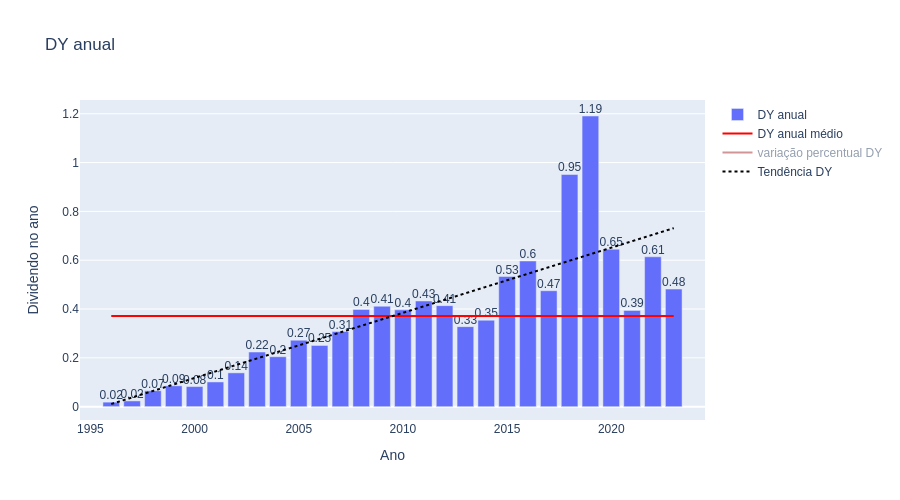

In [219]:
# tendencia do yield
df_m, df_b = np.polyfit(yanual.index.year, yanual.values, 1)

fig = go.Figure()

fig.add_trace(go.Bar(name='DY anual',
    x=yanual.index.year,
    y=yanual.values
))

fig.add_trace(go.Scatter(
    x=yanual.index.year,
    y=yanual.values,
    text= yanual.values.round(decimals=2),
    mode='text',
    textposition='top center',
    textfont=dict(
        size=12,
    ),
    showlegend=False
))


fig.add_trace(go.Scatter(name='DY anual médio',
    x=yanual.index.year,
    y=[yanual.values.mean()]*len(yanual.index.year),
    mode='lines',
    line = dict(color = 'red' , width=2)
))

fig.add_trace(go.Scatter(name='variação percentual DY', visible='legendonly',
    x=yanual.index.year,
    y=yanual.pct_change().fillna(0),
    mode='lines',
    marker = dict(color = 'brown')
))

fig.add_trace(go.Scatter(name='Tendência DY',
    x=yanual.index.year,
    y=df_m*yanual.index.year+df_b,
    mode='lines',
    line = dict(color = 'black', dash='dot')
))

fig.update_layout(title= "DY anual" , width=900, height=500 )
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="Dividendo no ano")

fig.show()

# preço


In [127]:
qual_preco = 'Adj Close' #@param ['Open','High','Close','Low','Adj Close']


In [128]:
# def forma_par(x,y,x_nome='x',y_nome='y'):
#   '''
#    garante que o par de series tem o mesmos dias de negociação
#   '''
#   pairs = pd.DataFrame()
#   pairs = pd.merge(x,y,left_index = True, right_index = True, how = 'inner')
#   pairs.columns = [x_nome,y_nome]

#   return pairs


In [129]:
preco = pd.DataFrame()
preco = pd.merge(ativo[qual_preco],ibov[qual_preco],left_index = True, right_index = True, how = 'inner')
preco.columns = [codigo,"ibov"]
preco

,ITSA4,ibov
Date,,
2000-01-03,0.451355,16930.000000
2000-01-04,0.408261,15851.000000
2000-01-05,0.442283,16245.000000
2000-01-06,0.449087,16107.000000
2000-01-07,0.446819,16309.000000
...,...,...
2023-11-17,9.840000,125062.000000
2023-11-20,9.940000,126095.000000
2023-11-21,9.940000,125607.000000


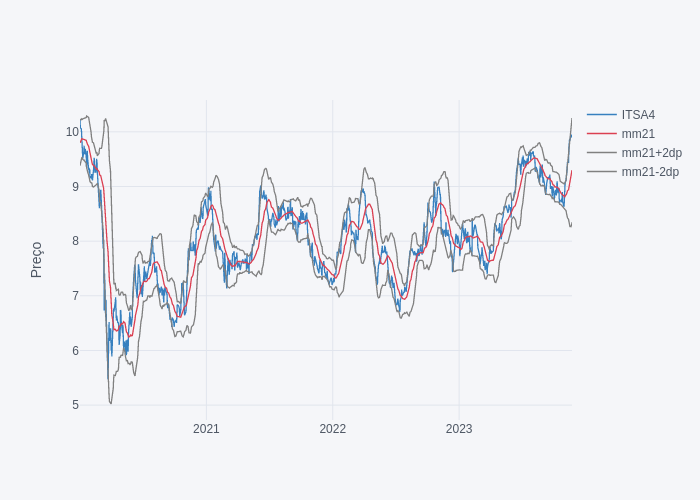

In [220]:
# Bandas com média movel 21 periodos e 2dp
preco['mm21'] = preco[codigo].rolling(21).mean()
Mov_SD = preco[codigo].rolling(21).std(ddof=0)
preco['mm21+2dp'] = preco['mm21'] + 2*Mov_SD
preco['mm21-2dp'] = preco['mm21'] - 2*Mov_SD
preco.loc['2020':].iplot(keys = [codigo,'mm21','mm21+2dp','mm21-2dp'], yTitle='Preço',
            colors=['blue','red','gray','gray'] )

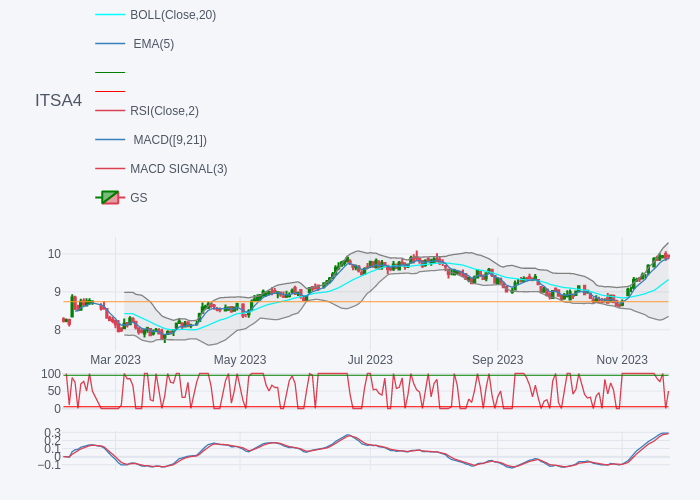

In [221]:
if len(ativo>200) :
  qf=cf.QuantFig(ativo[-200:],title=codigo,legend='top',name='GS',up_color='green', down_color='red' )
  qf.add_bollinger_bands(periods=20, boll_std=2, colors=['cyan','grey'], fill=True)
  qf.add_ema(periods=5)
  qf.add_rsi(periods=2,color='red',rsi_upper=95,rsi_lower=5,showbands=True)
  qf.add_macd(fast_period=9,slow_period=21,signal_period=3)
  qf.add_resistance(date='2023-02-17', on='close', color='orange')

  fig = qf.figure()
  fig.update_xaxes(
      rangebreaks=[dict(bounds=["sat", "mon"])])
  fig.show()

###simulação de preços
via [movimento browniano geométrico](https://pt.wikipedia.org/wiki/Movimento_browniano_geom%C3%A9trico) (GBM)

In [132]:
n_dias =         10#@param {type:"integer"}
n_grafico =  2*n_dias
n_cenarios =    500#@param {type:"integer"}

In [133]:
s_media     = (np.log( preco[codigo]/ preco[codigo].shift(1))).mean()
s_variancia = (np.log( preco[codigo]/ preco[codigo].shift(1))).var()
s_desvio_padrao = s_variancia**.5
## simula movimento browniano geométrico (MBG)
Z = stats.norm.ppf(np.random.rand(n_dias,n_cenarios))
retornos_diarios = np.exp((s_media - (0.5 * s_variancia)) + s_desvio_padrao * Z)
previsoes = np.zeros_like(a = np.arange(n_grafico*n_cenarios),dtype=float,shape=(n_grafico,n_cenarios))

for dia in range(n_grafico) :
  if dia < (n_grafico - n_dias) :
    previsoes[dia] = preco[codigo].tail(n_grafico - n_dias).values[dia]
  else :
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia - (n_grafico-n_dias)]

cenarios = pd.DataFrame()
for i in range(len(previsoes.T)):
  cenarios['cenario'+str(i)] = previsoes.T[i]


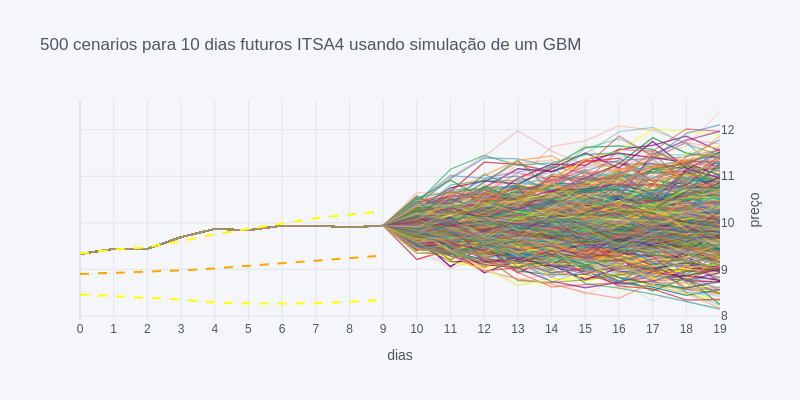

In [222]:
fig = cenarios.iplot(asFigure=True)

titulo = str(n_cenarios)+' cenarios para '+str(n_dias)+' dias futuros '+codigo+ ' usando simulação de um GBM'
layout = go.Layout(title=titulo,
                   yaxis={'title' : 'preço' , 'side' : 'right'},
                   xaxis={'title' : 'dias' , 'dtick' : 1 })


fig.update_layout(layout,showlegend=False,width=800,height=400)

fig.add_trace(go.Scatter(name='mm21',
                         x=pd.Series(range(n_grafico-n_dias)) ,
                         y= preco['mm21'][-(n_grafico-n_dias):].values,
                         mode='lines', line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(name='upper BB',
                         x=pd.Series(range(n_grafico-n_dias)) ,
                         y= preco['mm21+2dp'][-(n_grafico-n_dias):].values,
                         mode='lines', line=dict(color='yellow', dash='dash')))
fig.add_trace(go.Scatter(name='lower BB',
                         x=pd.Series(range(n_grafico-n_dias)) ,
                         y= preco['mm21-2dp'][-(n_grafico-n_dias):].values,
                         mode='lines',line=dict(color='yellow', dash='dash')))


fig.show()

intervalo de confiança para preços na  simulação


In [135]:
alfa=0.9

for i in range(n_dias):
  print('dia'+str(i+1)+': '+str(round(alfa*100))+'% -' , end='')
  print(stats.norm.interval(confidence=alfa, loc=np.mean(previsoes[n_grafico - n_dias +i]), scale=stats.sem(previsoes[n_grafico - n_dias +i])))#,end=', 99% - ')
#   print(stats.norm.interval(confidence=alfa, loc=np.mean(previsoes[n_grafico - n_dias +i]), scale=stats.sem(previsoes[n_grafico - n_dias +i])))


dia1: 90% -(9.924618501463158, 9.961773023314649)
dia2: 90% -(9.906922970251852, 9.959767178782762)
dia3: 90% -(9.9230966587624, 9.988586530654235)
dia4: 90% -(9.915576961533983, 9.990766664374117)
dia5: 90% -(9.922308372994035, 10.005043184176348)
dia6: 90% -(9.936131900854246, 10.026458546028909)
dia7: 90% -(9.949205631642808, 10.046879254257544)
dia8: 90% -(9.958769165735045, 10.061817110881329)
dia9: 90% -(9.966707333329008, 10.07631567991151)
dia10: 90% -(9.963807433985833, 10.079994559933178)


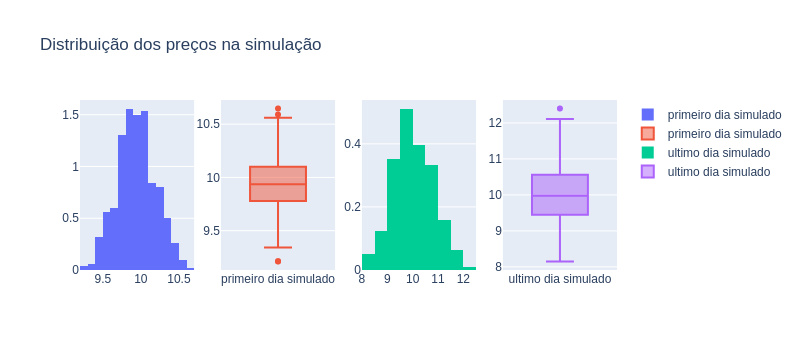

In [223]:
title='Distribuição dos preços na simulação'

from plotly.subplots import make_subplots

trace1 = go.Histogram(x=previsoes[n_grafico - n_dias] , nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='primeiro dia simulado')
trace3 = go.Histogram(x=previsoes[-1], nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='ultimo dia simulado')
trace2 = go.Box(y=previsoes[n_grafico - n_dias],name='primeiro dia simulado')
trace4 = go.Box(y=previsoes[-1],name='ultimo dia simulado')

fig = make_subplots(rows=1, cols=4)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig['layout'].update(height=350, width=800, title=title)

fig.show()

###tendência/estacionariedade

Uma série temporal (ou processo estocástico) é definida como fortemente estacionária se sua distribuição de probabilidade conjunta for invariante sob translações no tempo ou no espaço. Em particular, a média e a variância do processo não mudam ao longo do tempo ou do espaço e cada uma delas não segue uma tendência. Uma característica crítica das séries de preços estacionárias é que os preços dentro da série se difundem a partir do seu valor inicial a uma taxa mais lenta do que a de um GBM. Medindo a taxa desse comportamento difusivo podemos identificar a natureza da série temporal.

Vamos agora delinear um cálculo, nomeadamente o *Expoente de Hurst*, que nos ajuda a caracterizar a estacionariedade de uma série temporal.

*Expoente de Hurst* — Uma maneira rápida de investigar se uma determinada série temporal é "tendência", "reversão à média" ou "passeio aleatória". É  uma medida para a memória de longo prazo de uma série temporal, ou seja, para medir a quantidade pela qual essa série se desvia de um passeio aleatório.

A ideia é usar a variância de uma série logarítmica de preços para avaliar a taxa de comportamento difusivo. Por um *lag* de tempo arbitrário $\tau$
a variância é dada por: $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2$, e como estamos comparando a taxa de difusão com a de um Movimento Geométrico Browniano, podemos usar o fato de que em geral temos que a variância é proporcional a $\tau$, para $\tau$ grande, no caso de um GBM: $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2 \sim \tau$.  A principal conclusão é que se existirem quaisquer autocorrelações então a relação acima não é válida. Nesse caso, modificamos para incluir um valor de expoente $H$:  $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2 \sim \tau^{2H}$, o que nos dá o valor do Expoente de Hurst $H$.

Os valores do expoente de Hurst variam entre 0 e 1 com os quais podemos classificar qualquer série temporal em uma das três categorias:
* H < 0,5 — uma série de reversão à média. Quanto mais próximo 0, mais força tem o processo de reversão à média.
* H = 0,5 — um passeio aleatório (GBM).
* H > 0,5 — uma série de tendência. Quanto mais próximo de 1, mais forte será a tendência.

In [137]:
def get_hurst_exponent(ts, max_lag=100):
    lags = range(2, max_lag)
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)[0]

    return poly * 2.0

Exemplo

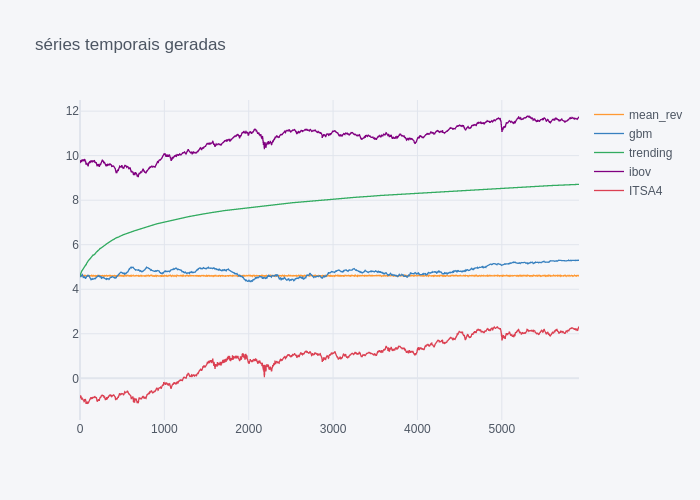

exponetes de Hurst com lag 20  ----
mean_rev: -0.0012
gbm: 0.5278
trending: 0.8719
ibov: 0.4822
ITSA4: 0.4059
----
exponetes de Hurst com lag 100  ----
mean_rev: -0.0007
gbm: 0.5328
trending: 0.8937
ibov: 0.4978
ITSA4: 0.4218
----
exponetes de Hurst com lag 300  ----
mean_rev: 0.0003
gbm: 0.5136
trending: 0.8497
ibov: 0.4709
ITSA4: 0.4065
----
exponetes de Hurst com lag 500  ----
mean_rev: 0.0002
gbm: 0.5043
trending: 0.8071
ibov: 0.4571
ITSA4: 0.4187
----


In [224]:
sample_size = len(preco)
scalar = 100

np.random.seed(123)
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar),
                        "ibov" : np.log(preco['ibov'].values),
                        codigo: np.log( preco[codigo].values)}
                  )
df.iplot(title="séries temporais geradas");

for lag in [20, 100, 300, 500]:
    print(f"exponetes de Hurst com lag {lag}  ----")
    for column in df.columns:
        print(f"{column}: {get_hurst_exponent(df[column].values, lag):.4f}")
    print('----')

#### Reversão à média


Uma série temporal contínua com reversão à média pode ser representada por uma equação diferencial estocástica de Ornstein-Uhlenbeck: $dX_t = \theta(\mu-X_t)dt + \sigma dW_t$ onde $\theta$ é a taxa de reversão à média, $\mu$ é o valor  médio do processo, $\sigma$ é a variância do processo e $W_t$ é um Processo de Wiener (Movimento Browniano). Num cenário discreto a equação afirma que a mudança da série de preços no próximo período de tempo é proporcional à diferença entre o preço médio e o preço atual, com a adição de ruído gaussiano.

*Teste Dickey-Fuller Aumentado (ADF)*: testa a presença de uma *raiz unitária* em uma amostra de série temporal autorregressiva. Aproveita o fato de que se uma série de preços possuir reversão à média, então o próximo nível de preços será proporcional ao nível de preços atual. Um modelo linear de *lag* $p$ é usado para a série temporal: $\Delta y_t = \alpha + \beta t + \gamma y_t + \sum_{i=1}^{p-1} \delta_i y_{t-i}$

Onde $\alpha$ é uma constante, $\beta$ representa o coeficiente de uma tendência temporal. O papel do teste de hipótese ADF é considerar a hipótese nula de que $\gamma=0$, o que indicaria (com $\alpha=\beta=0$) que o processo é um passeio aleatório e, portanto, não tem reversão média. Se a hipótese de que $\gamma=0$ pode ser rejeitada, então o movimento seguinte da série de preços é proporcional ao preço atual e, portanto, é improvável que seja um passeio aleatório. A estatística de teste é um número negativo e, portanto, para ser significativo além dos valores críticos, o número deve ser mais negativo que esses valores, ou seja, menor que os valores críticos.

Uma questão prática é que qualquer desvio constante de longo prazo num preço é de uma magnitude muito menor do que qualquer flutuação de curto prazo e, por isso, é frequentemente assumido  $\beta=0$. Além disso, geralmente, é  suficiente definir $p=1$ para nos permitir rejeitar a hipótese nula.

In [139]:
def check_estacionaridade(X, cutoff=0.01):
    '''
    H_0 é nao-estacionário, i.e., admite raiz unitaria (teste adfuller)
  Returns
    test statistic
    pvalue
    used lag
    n obs
    critical values dict at the 1 %, 5 %, and 10 % levels.
    '''

    from statsmodels.tsa.stattools import adfuller

    print(adfuller(X))

    pvalue = adfuller(X)[1]

    if pvalue < cutoff:
        print(f' \n p-value = {pvalue}. A serie {X.name} é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança {100*(1-pvalue)}.')
        return True
    else:
        mesg = 'não podemos rejeitar a hipótese nula de que existe uma raiz unitária, e, portanto, é improvável que tenhamos encontrado uma série temporal com reversão à média, o que implica que a série de dados não é estacionária.'
        print("\n".join(textwrap.wrap(mesg,118)))
        return False

In [140]:
check_estacionaridade( preco[codigo])

(-0.32650743112769626, 0.9216652805556955, 23, 5892, {'1%': -3.431460344744709, '5%': -2.862030668661722, '10%': -2.567031180710817}, -11590.624820988985)
não podemos rejeitar a hipótese nula de que existe uma raiz unitária, e, portanto, é improvável que tenhamos
encontrado uma série temporal com reversão à média, o que implica que a série de dados não é estacionária.


False

In [141]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# plot_acf( preco[codigo])

(-16.10669590208099, 5.063871554667786e-29, 22, 5892, {'1%': -3.431460344744709, '5%': -2.862030668661722, '10%': -2.567031180710817}, -11589.535554401704)
 
 p-value = 5.063871554667786e-29. A serie Delta de ITSA4 é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança 100.0.


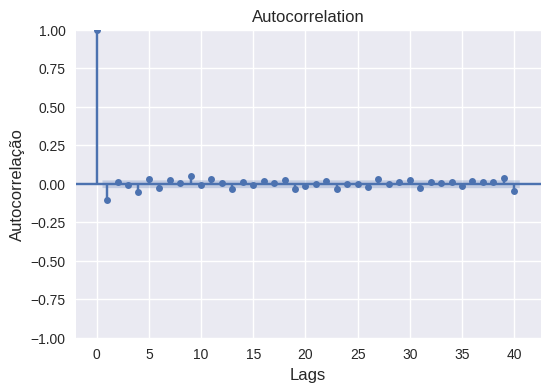

In [142]:
Delta_preco = preco[codigo].diff()[1:]
Delta_preco.name =  'Delta de ' + preco[codigo].name
if check_estacionaridade(Delta_preco) :
  plt.rcParams['figure.figsize'] = [6,4]
  plot_acf(Delta_preco, lags=40)
  plt.xlabel('Lags', fontsize=12)
  plt.ylabel('Autocorrelação', fontsize=12)
  plt.plot();

#### cointegração

É difícil encontrar um ativo possua um comportamento de reversão à média, as ações comportam-se geralmente como GBM. A forma mais simples de estratégias  de reversão à média é a clássica "pair trading", que geralmente envolve um par de ações "long-short" neutro em relação ao mercado. A teoria diz que duas empresas do mesmo setor estarão provavelmente expostas a fatores de mercado semelhantes, que afetam os seus negócios. Ocasionalmente, os preços relativos das suas ações divergirão devido a determinados eventos, mas reverterão para a média de longo prazo.

In [143]:
from statsmodels.tsa.stattools import coint

def zscore(series):
    return (series - series.mean()) / np.std(series)

def residuos (x,y)  :
  # slope,intercept, r, pvalue, stderr = stats.linregress(y=y,x=x)
  from scipy import stats
  return y - stats.linregress(y=y,x=x)[0] * x

In [144]:
if usar_periodo :
  IBr50_preco = yf.download((pd.Series(IBr50)+'.SA').to_list(), period = periodo , progress = False)[qual_preco]
  IBr50_preco = IBr50_preco.loc[preco.index[0]:]
else :
  IBr50_preco = yf.download((pd.Series(IBr50)+'.SA').to_list(), start=inicio , end=termino , progress = False)[qual_preco]

In [145]:
pair=pd.DataFrame()

if check_estacionaridade(Delta_preco) :

  min_score=0.0
  cont=0
  X = pd.Series( preco[codigo])

  print(codigo+' cointegra com ')
  for T in IBr50 :
      temp = pd.merge(X,IBr50_preco[T+'.SA'],left_index=True,right_index=True,how='inner').dropna()
      X= temp.iloc[:,0]
      Y= temp.iloc[:,1]
      t,p,c = coint(X,Y)
      for pvalue in [0.01,0.05, 0.1] :
        if p < pvalue :
          cont+=1
          print(f'{T} no nivel de confiança {(1-pvalue)*100}%', end=" - ")
          if pvalue == 0.01 : vc=c[0]
          elif pvalue == 0.05 : vc=c[1]
          else : vc=c[2]
          print(f'score={t} para o valor crítico {vc} em {len(X)} dias')
          if t < min_score :
            min_score=t
            Min_score=T
            pair = temp
          break


(-16.10669590208099, 5.063871554667786e-29, 22, 5892, {'1%': -3.431460344744709, '5%': -2.862030668661722, '10%': -2.567031180710817}, -11589.535554401704)
 
 p-value = 5.063871554667786e-29. A serie Delta de ITSA4 é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança 100.0.
ITSA4 cointegra com 
BNBR3 no nivel de confiança 90.0% - score=-3.1887463001439933 para o valor crítico -3.0516707922624833 em 589 dias
PINE4 no nivel de confiança 95.0% - score=-3.4418220666298462 para o valor crítico -3.3473641637909264 em 546 dias
BGIP4 no nivel de confiança 90.0% - score=-3.288387799620187 para o valor crítico -3.0522411758269503 em 546 dias
ITSA3 no nivel de confiança 90.0% - score=-3.195593790397871 para o valor crítico -3.0522411758269503 em 546 dias
BEES4 no nivel de confiança 90.0% - score=-3.062238927712307 para o valor crítico -3.0522411758269503 em 546 dias
BPAC11 no nivel de confiança 90.0% - score=-3.0975218264971285 para o valor crítico -3.052241175826950

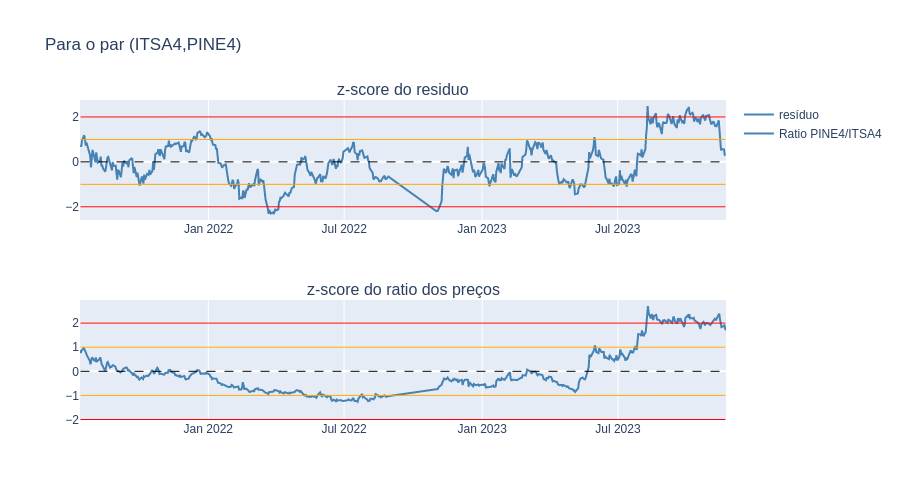

In [225]:
 if cont>0 :
  x = pair.iloc[:,0]
  y = pair.iloc[:,1]
  slope,intercept, r, pvalue, stderr = stats.linregress(y=y,x=x)
  residuos =  y - slope * x

  trace1 = go.Scatter( x = residuos.index,  y = zscore(residuos) ,
                      name = 'resíduo',
                      line=dict(color='steelblue'))

  trace2 = go.Scatter( x = y.index,  y = zscore(y/x) ,
                      name = 'Ratio '+Min_score+'/'+codigo,
                      line=dict(color='steelblue'))

  fig = make_subplots(rows=2, cols=1,subplot_titles=(['z-score do residuo','z-score do ratio dos preços']))

  fig.append_trace(trace1, 1, 1)
  fig.append_trace(trace2, 2, 1)

  fig['layout'].update(shapes=[{'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'orange','width': 1}},
                              {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'orange','width': 1}},
                              {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'red','width': 1}},
                              {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'red','width': 1}},
                              {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'black','width': 1,'dash':'dash'}},
                              {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'black','width': 1,'dash':'dash'}},
                              {'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'orange','width': 1}},
                              {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'orange','width': 1}},
                              {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'red','width': 1}},
                              {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'red','width': 1}}
                              ],title='Para o par ('+codigo+','+Min_score+')',
                      width=900,
                      height=500)
  fig.show()

simula pair trading na par acima:

lookback performance ...


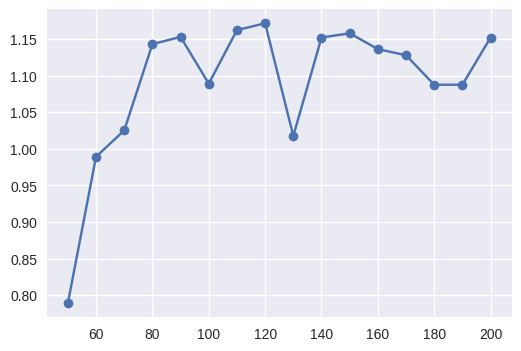

In [147]:
if cont>0 :
  symbols = (Min_score, codigo)

  def build_pair(symbols):
    pairs = pd.DataFrame(index=x.index)
    pairs[codigo] = x
    pairs[Min_score] = y
    pairs.index = pd.to_datetime(pairs.index)
    return pairs.dropna()

  def calculate_spread_zscore(pairs, symbols, lookback=100) :
    from statsmodels.regression.rolling import RollingOLS
    model = RollingOLS(
          endog=pairs[symbols[0]],
          exog=sm.add_constant(pairs[symbols[1]]),
          window=lookback
      )
    rres = model.fit()
    params = rres.params.copy()
    pairs['hedge_ratio'] = params[symbols[1]]
    pairs.dropna(inplace=True)

    # spread e z-score do spread
    pairs['spread'] = (pairs[symbols[0]] - pairs['hedge_ratio']*pairs[symbols[1]] )
    pairs['zscore'] = zscore(pairs['spread'])
    #pairs['spread'] - np.mean(pairs['spread']))/np.std(pairs['spread'])

    return pairs

  def create_long_short_market_signals(pairs, symbols, z_entry_threshold=2.0, z_exit_threshold=1.0):

    pairs['longs']  = (pairs['zscore'] <= -z_entry_threshold)*1.0
    pairs['shorts'] = (pairs['zscore'] >= z_entry_threshold)*1.0
    pairs['exits']  = (np.abs(pairs['zscore']) <= z_exit_threshold)*1.0

    # precisamos propagar uma posição para frente, ou seja,
    # precisamos permanecer comprados se escore Z for menor que o limite de entrada de Z,
    # mas ainda maior que o limite de saída, e vice-versa para as vendas a descoberto.
    pairs['long_market'] = 0.0
    pairs['short_market'] = 0.0

    #controle de se devemos estar comprados ou vendidos enquanto iteramos pelos dados de barras.
    long_market = 0
    short_market = 0

    # Calcula quando estar efetivamente comprado ou vendido, bem como quando não estar.
    for i, b in enumerate(pairs.iterrows()):
      # Calculate longs
      if b[1]['longs'] == 1.0:
          long_market = 1
      # Calculate shorts
      if b[1]['shorts'] == 1.0:
          short_market = 1
      # Calculate exists
      if b[1]['exits'] == 1.0:
          long_market = 0
          short_market = 0

      pairs.iloc[i]['long_market'] = long_market
      pairs.iloc[i]['short_market'] = short_market

    return pairs

  def create_portfolio_returns(pairs, symbols):

      sym1 = symbols[0]
      sym2 = symbols[1]

      # fluxo de retornos percentuais;
      # elimina todas as células NaN e -inf/+inf
      portfolio = pd.DataFrame(index=pairs.index)
      portfolio['positions'] = pairs['long_market'] - pairs['short_market']
      portfolio[sym1] = -1.0 * pairs[sym1] * portfolio['positions']
      portfolio[sym2] = pairs[sym2] * portfolio['positions']
      portfolio['total'] = portfolio[sym1] + portfolio[sym2]

      portfolio['returns'] = portfolio['total'].pct_change()
      portfolio['returns'].fillna(0.0, inplace=True)
      portfolio['returns'].replace([np.inf, -np.inf], 0.0, inplace=True)
      portfolio['returns'].replace(-1.0, 0.0, inplace=True)

      portfolio['returns'] = (portfolio['returns'] + 1.0).cumprod()

      return portfolio


  returns = []
  lookbacks=range(50, 210, 10)

  for lb in range(50, 210, 10):
      pairs = build_pair(symbols)
      pairs = calculate_spread_zscore(pairs, symbols, lookback=lb)
      pairs = create_long_short_market_signals(pairs, symbols, z_entry_threshold=2.0, z_exit_threshold= 0.10)
      portfolio = create_portfolio_returns(pairs, symbols)
      returns.append(portfolio.iloc[-1]['returns'])

  print("lookback performance ...")
  plt.plot(lookbacks, returns, '-o')
  plt.show()

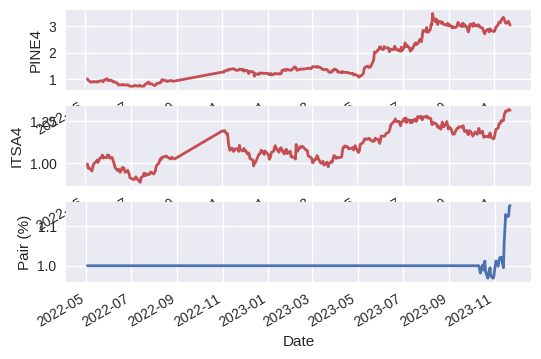

In [148]:
if cont > 0 :
  fig = plt.figure()

  ax1 = fig.add_subplot(311,  ylabel= symbols[0])
  (pairs[symbols[0]].pct_change()+1.0).cumprod().plot(ax=ax1, color='r', lw=2.)

  ax2 = fig.add_subplot(312,  ylabel= symbols[1])
  (pairs[symbols[1]].pct_change()+1.0).cumprod().plot(ax=ax2, color='r', lw=2.)

  ax3 = fig.add_subplot(313, ylabel='Pair (%)')
  portfolio['returns'].plot(ax=ax3, lw=2.)
  plt.show()

##Drawdown máximo no período


In [149]:
def cum_returns(returns, starting_value=0, out=None):
    """
    Compute cumulative returns from simple returns.

    Parameters
    ----------
    returns : pd.Series, np.ndarray, or pd.DataFrame
        Returns of the strategy as a percentage, noncumulative.
        Also accepts two dimensional data. In this case, each column is cumulated.
    starting_value : float, optional.
        The starting returns.
    out : array-like, optional
        Array to use as output buffer.
        If not passed, a new array will be created.

    Returns
    -------
    cumulative_returns : array-like
        Series of cumulative returns.
    """
    if len(returns) < 1:
        return returns.copy()

    nanmask = np.isnan(returns)
    if np.any(nanmask):
        returns = returns.copy()
        returns[nanmask] = 0

    allocated_output = out is None
    if allocated_output:
        out = np.empty_like(returns)

    np.add(returns, 1, out=out)
    out.cumprod(axis=0, out=out)

    if starting_value == 0:
        np.subtract(out, 1, out=out)
    else:
        np.multiply(out, starting_value, out=out)

    if allocated_output:
        if returns.ndim == 1 and isinstance(returns, pd.Series):
            out = pd.Series(out, index=returns.index)
        elif isinstance(returns, pd.DataFrame):
            out = pd.DataFrame(
                out, index=returns.index, columns=returns.columns,
            )

    return out


In [150]:
def get_max_drawdown_underwater(underwater):
    """
    Determines peak, valley, and recovery dates given an 'underwater'
    DataFrame.

    An underwater DataFrame is a DataFrame that has precomputed
    rolling drawdown.

    Parameters
    ----------
    underwater : pd.Series
       Underwater returns (rolling drawdown) of a strategy.

    Returns
    -------
    peak : datetime
        The maximum drawdown's peak.
    valley : datetime
        The maximum drawdown's valley.
    recovery : datetime
        The maximum drawdown's recovery.
    """

    valley = underwater.idxmin()  # end of the period
    # Find first 0
    peak = underwater[:valley][underwater[:valley] == 0].index[-1]
    # Find last 0
    try:
        recovery = underwater[valley:][underwater[valley:] == 0].index[0]
    except IndexError:
        recovery = np.nan  # drawdown not recovered
    return peak, valley, recovery


def get_top_drawdowns(returns, top=10):
    """
    Finds top drawdowns, sorted by drawdown amount.

    Parameters
    ----------
    returns : pd.Series
        Daily returns of the strategy, noncumulative.
         - See full explanation in tears.create_full_tear_sheet.
    top : int, optional
        The amount of top drawdowns to find (default 10).

    Returns
    -------
    drawdowns : list
        List of drawdown peaks, valleys, and recoveries. See get_max_drawdown.
    """

    returns = returns.copy()
    df_cum = cum_returns(returns, 1.0)
    running_max = np.maximum.accumulate(df_cum)
    underwater = df_cum / running_max - 1

    drawdowns = []
    for _ in range(top):
        peak, valley, recovery = get_max_drawdown_underwater(underwater)
        # Slice out draw-down period
        if not pd.isnull(recovery):
            underwater.drop(underwater[peak: recovery].index[1:-1],
                            inplace=True)
        else:
            # drawdown has not ended yet
            underwater = underwater.loc[:peak]

        drawdowns.append((peak, valley, recovery))
        if ((len(returns) == 0)
                or (len(underwater) == 0)
                or (np.min(underwater) == 0)):
            break

    return drawdowns


def gen_drawdown_table(returns, top=10):
    """
    Places top drawdowns in a table.

    Parameters
    ----------
    returns : pd.Series
        Daily returns of the strategy, noncumulative.
         - See full explanation in tears.create_full_tear_sheet.
    top : int, optional
        The amount of top drawdowns to find (default 10).

    Returns
    -------
    df_drawdowns : pd.DataFrame
        Information about top drawdowns.
    """

    df_cum = cum_returns(returns, 1.0)
    drawdown_periods = get_top_drawdowns(returns, top=top)
    df_drawdowns = pd.DataFrame(index=list(range(top)),
                                columns=['Net drawdown in %',
                                         'Peak date',
                                         'Valley date',
                                         'Recovery date',
                                         'Duration'])

    for i, (peak, valley, recovery) in enumerate(drawdown_periods):
        if pd.isnull(recovery):
            df_drawdowns.loc[i, 'Duration'] = np.nan
        else:
            df_drawdowns.loc[i, 'Duration'] = len(pd.date_range(peak,
                                                                recovery,
                                                                freq='B'))
        df_drawdowns.loc[i, 'Peak date'] = (peak.to_pydatetime()
                                            .strftime('%Y-%m-%d'))
        df_drawdowns.loc[i, 'Valley date'] = (valley.to_pydatetime()
                                              .strftime('%Y-%m-%d'))
        if isinstance(recovery, float):
            df_drawdowns.loc[i, 'Recovery date'] = recovery
        else:
            df_drawdowns.loc[i, 'Recovery date'] = (recovery.to_pydatetime()
                                                    .strftime('%Y-%m-%d'))
        df_drawdowns.loc[i, 'Net drawdown in %'] = (
            (df_cum.loc[peak] - df_cum.loc[valley]) / df_cum.loc[peak]) * 100

    df_drawdowns['Peak date'] = pd.to_datetime(df_drawdowns['Peak date'])
    df_drawdowns['Valley date'] = pd.to_datetime(df_drawdowns['Valley date'])
    df_drawdowns['Recovery date'] = pd.to_datetime(
        df_drawdowns['Recovery date'])

    return df_drawdowns



In [151]:
from matplotlib.ticker import FuncFormatter


def two_dec_places(x, pos):
    """
    Adds 1/100th decimal to plot ticks.
    """

    return '%.2f' % x

def plot_drawdown_periods(returns, top=3, ax=None, **kwargs):
    """
    Plots cumulative returns highlighting top drawdown periods.

    Parameters
    ----------
    returns : pd.Series. Daily returns of the strategy, noncumulative.
    top : int, optional. Amount of top drawdowns periods to plot (default 10).
    ax : matplotlib.Axes, optional. Axes upon which to plot.
    **kwargs, optional. Passed to plotting function.

    Returns
    -------
    ax : matplotlib.Axes
        The axes that were plotted on.
    """

    if ax is None:
        ax = plt.gca()

    y_axis_formatter = FuncFormatter(two_dec_places)
    ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))

    df_cum_rets = cum_returns(returns, starting_value=1.0)
    df_drawdowns = gen_drawdown_table(returns, top=top)

    df_cum_rets.plot(ax=ax, **kwargs)

    lim = ax.get_ylim()
    colors = sns.cubehelix_palette(len(df_drawdowns))[::-1]
    for i, (peak, recovery) in df_drawdowns[
            ['Peak date', 'Recovery date']].iterrows():
        if pd.isnull(recovery):
            recovery = returns.index[-1]
        ax.fill_between((peak, recovery),
                        lim[0],
                        lim[1],
                        alpha=.4,
                        color=colors[i])
    ax.set_ylim(lim)
    ax.set_title('Top %i drawdown periods' % top)
    ax.set_ylabel('Cumulative returns')
    ax.legend(['Portfolio'], loc='upper left',
              frameon=True, framealpha=0.5)
    ax.set_xlabel('')
    return ax

<Axes: title={'center': 'Top 3 drawdown periods'}, ylabel='Cumulative returns'>

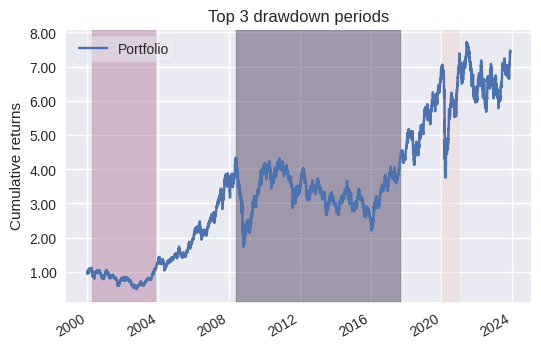

In [152]:
 plot_drawdown_periods(preco['ibov'].pct_change())

In [153]:
def get_max_drawdown(price):
  data = pd.DataFrame(price)
  column = price.name
  data['max'] = data[column].cummax()
  data['delta'] = data['max'] - data[column]
  data['dd'] = 100 * (data['delta'] / data['max'])
  maxdrawdown = data['dd'].max()
  bottom_day = data['dd'].idxmax()
  bottom_index = data[['dd']].index.get_loc(bottom_day)
  max_value = data.iloc[bottom_index]['max']
  top_day = (data['max'] == max_value).idxmax()
  top_index = data[['max']].index.get_loc(top_day)
  return maxdrawdown, bottom_day, bottom_index, top_day, top_index

In [154]:
dd, bday, bindex, tday, tindex = get_max_drawdown( preco[codigo])
print('max drawdown ', round(dd,2),'% de ', tday.strftime('%d/%m/%Y') , ' até ' , bday.strftime('%d/%m/%Y') )

max drawdown  65.94 % de  08/10/2007  até  27/10/2008


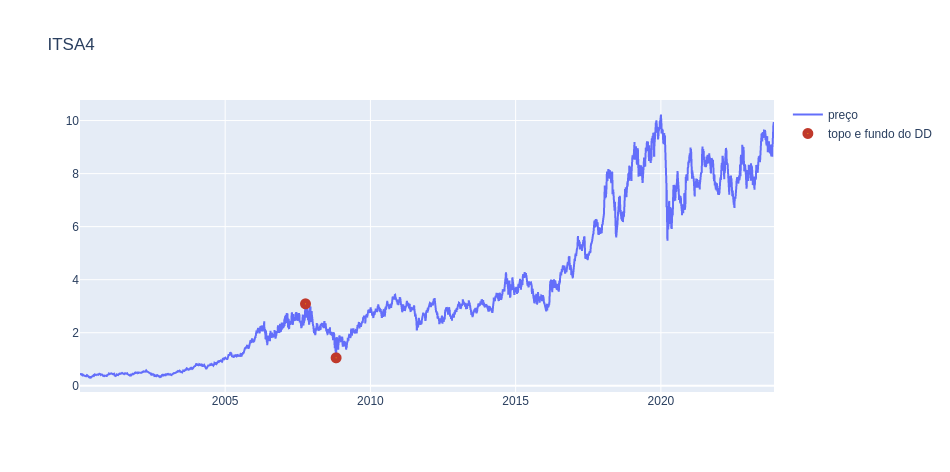

In [226]:
trace1 = go.Scatter(x = preco.index, y = preco[codigo], mode = 'lines' , name = 'preço' )
trace2 = go.Scatter(x = [preco.index[bindex],preco.index[tindex]],
                    y = [ preco[codigo].iloc[bindex] , preco[codigo].iloc[tindex]],
                   mode = 'markers', name = 'topo e fundo do DD',
                   marker =  {'color' : 'orange',
                              'line' : {'width': 5,
                                        'color': '#c0392b'}} )
layout =  dict( title = codigo, height = 472, width = 950, #  font = dict(  size = 10  ),
               )

data_trace = [trace1,trace2]

fig=go.Figure(data=data_trace , layout=layout)
fig.show()

In [156]:
#@title #### Drawdowns por ano
years = [*range(datetime.strptime(inicio, "%Y-%m-%d").year , datetime.strptime(termino, "%Y-%m-%d").year + 1)]
DDM = pd.DataFrame(columns=[codigo , 'Ibov'],index=years)

In [157]:
i=0
yearly_data=pd.DataFrame()
for year in years :
  yearly_data = preco[preco.index.year == year].copy()

  if len(yearly_data.index)>0 :
      yearly_dd1,_,_,_,_ = get_max_drawdown(yearly_data[codigo])
      yearly_dd2,_,_,_,_ = get_max_drawdown(yearly_data['ibov'])
      DDM.loc[year] = [round(yearly_dd1,2), round(yearly_dd2,2)]
  i=i+1
DDM.dropna(inplace=True)

Drawdowns máximos por ano:


,ITSA4,Ibov
2007,25.48,17.39
2008,56.82,59.96
2009,26.42,15.25
2010,16.45,18.94
2011,37.72,32.06
2012,29.77,23.27
2013,20.67,28.85
2014,22.32,24.05
2015,28.29,25.58
2016,16.91,12.04


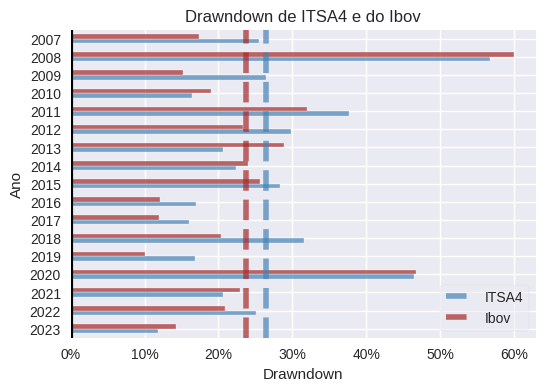

In [158]:
from matplotlib.ticker import FuncFormatter
def percentage(x, pos):
    return '%.0f%%' % x

ax = plt.gca()

x_axis_formatter = FuncFormatter(percentage)
ax.xaxis.set_major_formatter(FuncFormatter(x_axis_formatter))
ax.tick_params(axis='x', which='major')

ax.axvline(DDM[codigo].values.mean(),color='steelblue',linestyle='--',lw=4,alpha=0.7);
ax.axvline(DDM['Ibov'].values.mean(), color='brown',  linestyle='--',lw=4,alpha=0.7);
(DDM.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= ['steelblue','brown']);
ax.axvline(0.0, color='black', linestyle='-', lw=3);

ax.set_ylabel('Ano');
ax.set_xlabel('Drawndown');
ax.set_title("Drawndown de "+codigo+" e do Ibov");
ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

print('Drawdowns máximos por ano:')

DDM

# Retornos


In [159]:
preco['retorno'] = preco[codigo].pct_change()
preco['log_retorno'] = np.log( preco[codigo]) - np.log( preco[codigo].shift(1))
ibov['Preço'] = ibov[qual_preco]
ibov['retorno'] = ibov['Preço'].pct_change()
ibov['log_retorno'] = np.log(ibov['Preço']) - np.log(ibov['Preço'].shift(1))

In [160]:
retornos = pd.merge(ibov['retorno'], preco['retorno'],
                    left_index=True, right_index=True, how='inner')
retornos = retornos.rename(columns={ibov['retorno'].name+'_x':'r_ibov' , preco['retorno'].name+'_y':'r_'+codigo})
retornos['lr_ibov'] = ibov['log_retorno']
retornos['lr_'+codigo] = preco['log_retorno']
retornos.dropna(inplace=True)

print(retornos.shape)
retornos.head(2)

(5915, 4)


,r_ibov,r_ITSA4,lr_ibov,lr_ITSA4
Date,,,,
2000-01-04,-0.063733,-0.095477,-0.065855,-0.100347
2000-01-05,0.024856,0.083334,0.024553,0.080043


In [161]:
##semanal
weekly_returns = pd.DataFrame()
weekly_returns[codigo] = preco[codigo].resample('W').ffill()
weekly_returns['retorno'] =  weekly_returns[codigo].pct_change()
weekly_returns.dropna(inplace=True)

##mensal
monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco[codigo].resample('M').ffill()
monthly_returns['retorno'] = monthly_returns[codigo].pct_change()
monthly_returns.dropna(inplace=True)

In [162]:
monthly_returns.dropna()

,ITSA4,retorno
Date,,
2000-02-29,0.367435,-0.047059
2000-03-31,0.385580,0.049383
2000-04-30,0.351558,-0.088235
2000-05-31,0.337949,-0.038710
2000-06-30,0.392385,0.161075
...,...,...
2023-07-31,9.614625,0.023976
2023-08-31,9.069603,-0.056687
2023-09-30,8.997037,-0.008001


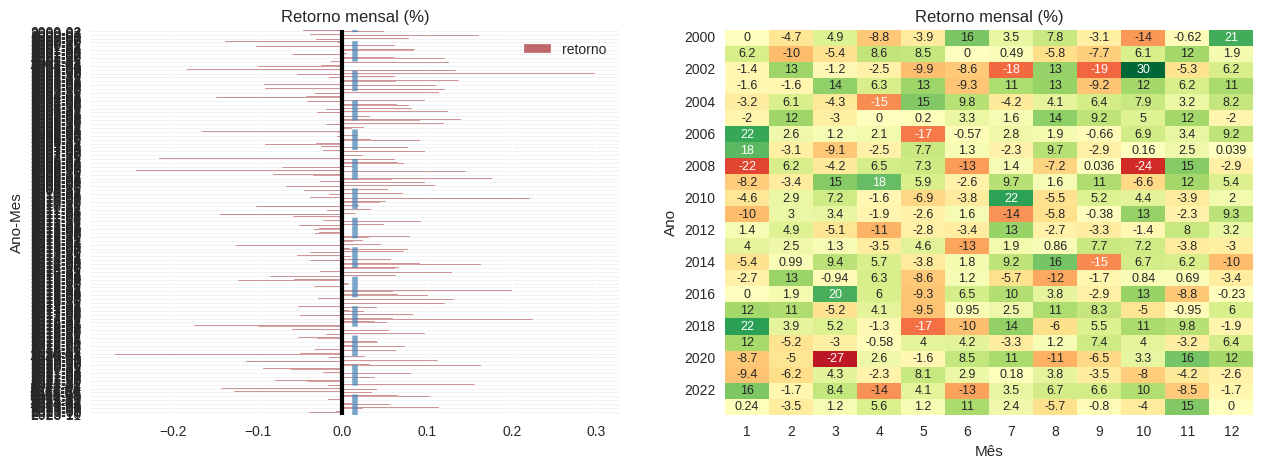

In [163]:
fig = plt.figure(1)
plt.subplot(1,2,1)
ax = plt.gca()

mr = pd.DataFrame(data=monthly_returns['retorno'])
mr.index = mr.index.to_period(freq='M')

ax.axvline(mr.values.mean(), color='steelblue',  linestyle='--',lw=4,alpha=0.7);
(mr.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= 'brown');
ax.axvline(0.0, color='black', linestyle='-', lw=3);
ax.set_ylabel('Ano-Mes')
ax.set_title("Retorno mensal (%)")

#ax.set_ylabel('Ano');
#ax.set_xlabel('Drawndown');
#ax.set_title("Drawndown de "+codigo+" e do Ibov");
#ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

plt.subplot(1,2,2)
ax = plt.gca()

returns_table = monthly_returns.pivot_table(values='retorno',
                               index=monthly_returns.index.year,
                               columns=monthly_returns.index.month,
                               aggfunc='mean')

sns.heatmap(returns_table.fillna(0)*100.0,annot=True,annot_kws={"size": 9},cmap='RdYlGn',
            alpha=1.0,center=0.0,cbar=False,ax=ax)
ax.set_ylabel('Ano')
ax.set_xlabel('Mês')
ax.set_title("Retorno mensal (%)")
fig.set_size_inches(15,5)
plt.show()

### normalidade na distribuição dos retornos

In [164]:
r_media = retornos['lr_'+codigo].mean()
r_variancia = retornos['lr_'+codigo].var()
r_desviopadrao = retornos['lr_'+codigo].std()

jb_test = stats.jarque_bera(retornos['lr_'+codigo].values)
print(f'teste Jarque-Bera: {jb_test[0]:.2f} com p-valor: {jb_test[1]:.2f}')
r_range = np.linspace(min(retornos['lr_'+codigo]), max(retornos['lr_'+codigo]), num=1000)
norm_pdf = stats.norm.pdf(r_range, loc=r_media , scale=r_desviopadrao)

teste Jarque-Bera: 10086.49 com p-valor: 0.00


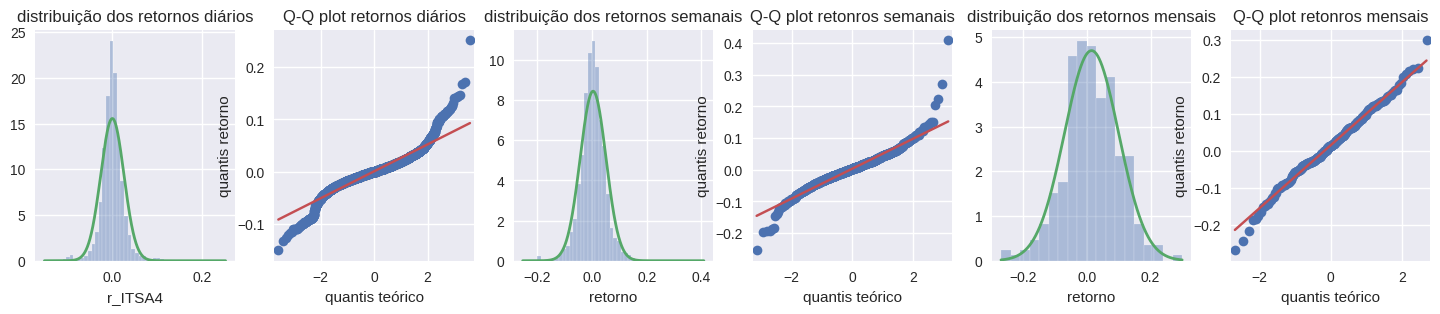

In [165]:
r_fig, ax = plt.subplots(1, 6 , figsize=(18,3))

r_range = np.linspace(min( retornos['r_'+codigo]), max( retornos['r_'+codigo]), num=1000)
# histograma diário
sns.distplot( retornos['r_'+codigo], kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('distribuição dos retornos diários')#, fontsize=12)
ax[0].plot(r_range, stats.norm.pdf(r_range, loc=r_media, scale=r_desviopadrao) ,#
           'g', lw=2,label=f'N({r_media:.2f}, {r_variancia:.4f})')
# Q-Q plot diário
qq1 = sm.qqplot( retornos['r_'+codigo].values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot retornos diários')#, fontsize = 12)
ax[1].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

##semanal
r_range = np.linspace(min(weekly_returns['retorno']), max(weekly_returns['retorno']), num=1000)
w_m = weekly_returns['retorno'].mean()
w_s = weekly_returns['retorno'].std()

# histograma semanal
sns.distplot(weekly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[2])
ax[2].set_title('distribuição dos retornos semanais')#, fontsize=12)
ax[2].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot semanal
qq2 = sm.qqplot(weekly_returns['retorno'].values, line='s', ax=ax[3])
ax[3].set_title('Q-Q plot retonros semanais')#, fontsize = 12)
ax[3].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')


##mensal
r_range = np.linspace(min(monthly_returns['retorno']), max(monthly_returns['retorno']), num=1000)
w_m = monthly_returns['retorno'].mean()
w_s = monthly_returns['retorno'].std()

# histograma mensal
sns.distplot(monthly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[4])
ax[4].set_title('distribuição dos retornos mensais')#, fontsize=12)
ax[4].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot mensal
qq2 = sm.qqplot(monthly_returns['retorno'].values, line='s', ax=ax[5])
ax[5].set_title('Q-Q plot retonros mensais')#, fontsize = 12)
ax[5].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

fig.tight_layout()
fig.show()

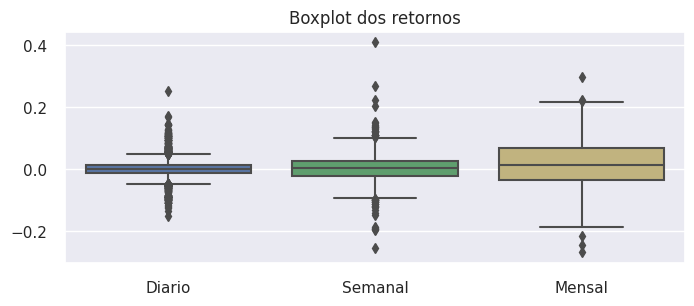

In [166]:
sns.set(rc={'figure.figsize':(8,3)})
sns.axes_style(style='darkgrid' )
ax = plt.gca()
ax.set_title('Boxplot dos retornos')
sns.boxplot(data=[retornos['r_'+codigo], weekly_returns['retorno'], monthly_returns['retorno']],
                palette=["#4c72B0", "#55A868", "#CCB974"], ax=ax)
ax.set_xticklabels(['Diario', 'Semanal', 'Mensal']);

comparação com ibov

In [167]:
print('-- Estatísticas do retorno diário')
tmp = [['Intervalo de datas' , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date)) , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date))],
       ['no. de observações' , retornos['r_'+codigo].shape[0] , retornos['r_ibov'].shape[0]],
       ['min', str(round( retornos['r_'+codigo].min()*100,3))+'%', str(round( retornos['r_ibov'].min()*100,3))+'%'],
       ['max', str(round( retornos['r_'+codigo].max()*100,3))+'%', str(round( retornos['r_ibov'].max()*100,3))+'%'],
       ['média', str(round( retornos['r_'+codigo].mean()*100,3))+'%', str(round( retornos['r_ibov'].mean()*100,3))+'%'],
       ['mediana', str(round( retornos['r_'+codigo].median()*100,3))+'%', str(round( retornos['r_ibov'].median()*100,3))+'%'],
       ['desvio padrão', str(round( retornos['r_'+codigo].std()*100,3))+'%', str(round( retornos['r_ibov'].std()*100,3))+'%'],
       ['assimetria', round( retornos['r_'+codigo].skew(),3), round( retornos['r_ibov'].skew(),3)],
       ['curtose', round( retornos['r_'+codigo].kurtosis(),3), round( retornos['r_ibov'].kurtosis(),3)],
       ['retorno anualizado',str(round( retornos['r_'+codigo].mean()*252*100,2))+'%' , str(round( retornos['r_ibov'].mean()*252*100,2))+'%'],
       ['dp anualizado',str(round( retornos['r_'+codigo].std()*np.sqrt(252)*100,2))+'%' , str(round( retornos['r_ibov'].std()*np.sqrt(252)*100,2))+'%'],
      ]
vol = pd.DataFrame(tmp , columns=['tmp' , 'r_'+codigo , 'r_ibov'], index=[i[0] for i in tmp])
vol.drop('tmp',axis=1, inplace=True)
data_table.DataTable(vol , include_index=True ,num_rows_per_page=15)

-- Estatísticas do retorno diário


,r_ITSA4,r_ibov
Intervalo de datas,2000-01-04 ~ 2023-11-23,2000-01-04 ~ 2023-11-23
no. de observações,5915,5915
min,-15.0%,-14.78%
max,25.147%,14.656%
média,0.085%,0.049%
mediana,0.0%,0.068%
desvio padrão,2.573%,1.754%
assimetria,0.406,-0.122
curtose,7.028,6.278
retorno anualizado,21.48%,12.45%


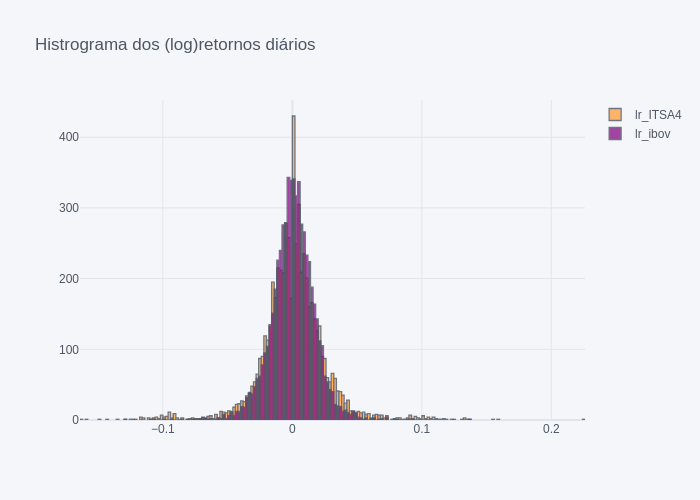

In [227]:
#@markdown histogramas dos (log)retornos diários

retornos.iplot(kind='histogram',
                  #subplots=True,
                  keys = ['lr_'+codigo,'lr_ibov'],
                  colors=['orange','purple'],
                  title='Histrograma dos (log)retornos diários',
                  #theme="henanigans"
                  )

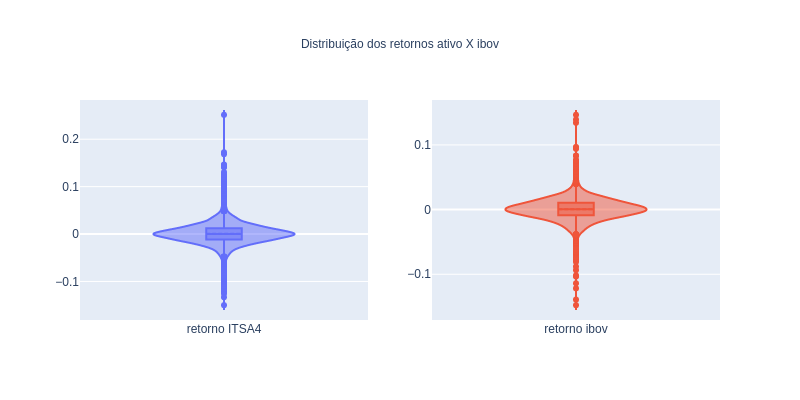

In [228]:
title = "Distribuição dos retornos ativo X ibov"

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_'+codigo].values, name='retorno '+codigo)
    ,row=1, col=1)
fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_ibov'], name='retorno ibov')
    ,row=1, col=2)
fig.update_layout(title_font_size=12 , width=800 , height=400 , showlegend=False,
               title={'text': title,'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},   )

fig.show()

In [170]:
stats.norm.interval(confidence=0.98,
              loc= retornos['r_ibov'].mean(),
              scale=retornos['r_ibov'].std())

(-0.04031364604538929, 0.0413021313525087)

Dados mensais

In [171]:
url_bcb_ipca= f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=csv"
ipca = pd.read_csv(url_bcb_ipca, sep=';' , decimal=',')
ipca['data'] = pd.to_datetime(ipca['data'], dayfirst=True)
ipca.set_index('data', inplace=True)
ipca.rename(columns={'valor': 'ipca (% m)'}, inplace=True)
# ipca[ipca.index>retornos.index[0]]

In [172]:
ipca

,ipca (% m)
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
...,...
2023-06-01,-0.08
2023-07-01,0.12
2023-08-01,0.23


In [173]:
url_bcb_cdi= f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.4392/dados?formato=csv"
cdi = pd.read_csv(url_bcb_cdi, sep=';', decimal=',')
cdi['data'] = pd.to_datetime(cdi['data'], dayfirst=True)
cdi.set_index('data', inplace=True)
cdi.rename(columns={'valor': 'cdi (% m)'}, inplace=True)
# cdi[cdi.index>retornos.index[0]]

In [174]:
cdi

,cdi (% m)
data,
1986-03-01,18.24
1986-04-01,17.75
1986-05-01,17.98
1986-06-01,20.51
1986-07-01,27.27
...,...
2023-07-01,13.65
2023-08-01,13.19
2023-09-01,12.97


In [175]:
bcb = pd.merge(ipca,cdi,left_index=True, right_index=True,how='inner')
bcb.tail()

,ipca (% m),cdi (% m)
data,,
2023-06-01,-0.08,13.65
2023-07-01,0.12,13.65
2023-08-01,0.23,13.19
2023-09-01,0.26,12.97
2023-10-01,0.24,12.65


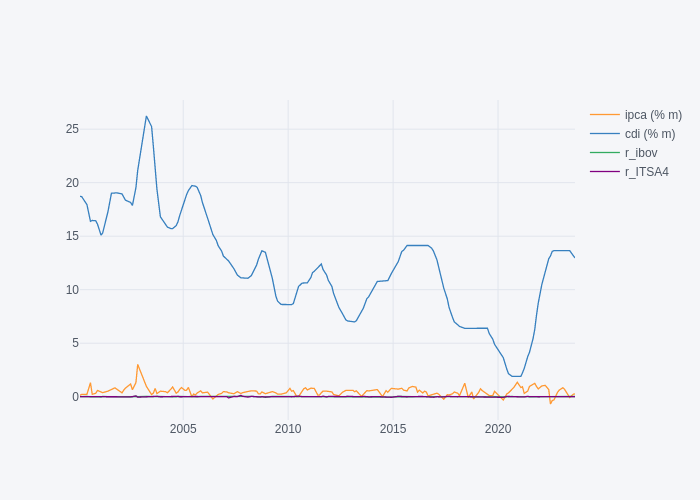

In [229]:
pd.merge(bcb,retornos[['r_ibov','r_'+codigo]],left_index=True, right_index=True,how='inner').iplot()

In [177]:
# md = preco[codigo].asfreq('M','ffill').pct_change().dropna()
# md

In [178]:
# @ markdown gráficos dos retornos mensais

monthly_data = pd.DataFrame()
monthly_data[[codigo,'ibov']] = preco[[codigo,'ibov']].resample('M').ffill().pct_change()
monthly_data=monthly_data[1:-1] # o primeiro é NaN e o útlimo fica errado se não fecou o mês

In [179]:
pd.merge(monthly_data,bcb,left_index=True, right_index=True,how='inner')

,ITSA4,ibov,ipca (% m),cdi (% m)


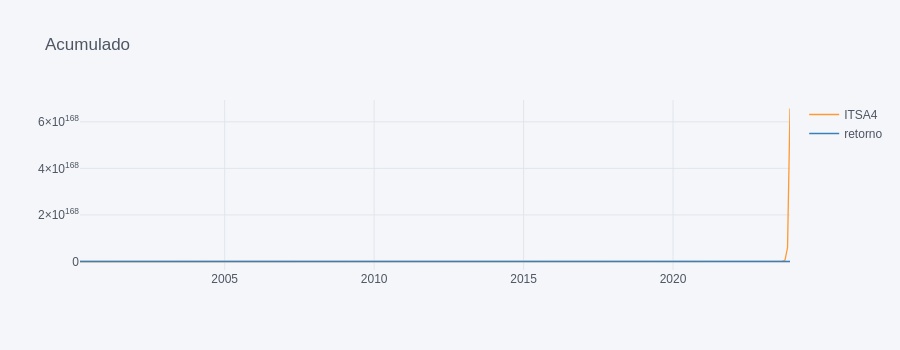

In [230]:
cum_returns = (monthly_returns + 1).cumprod() - 1
trace3 = cum_returns.iplot(title= 'Acumulado',dimensions=(900,350))

###Underwater

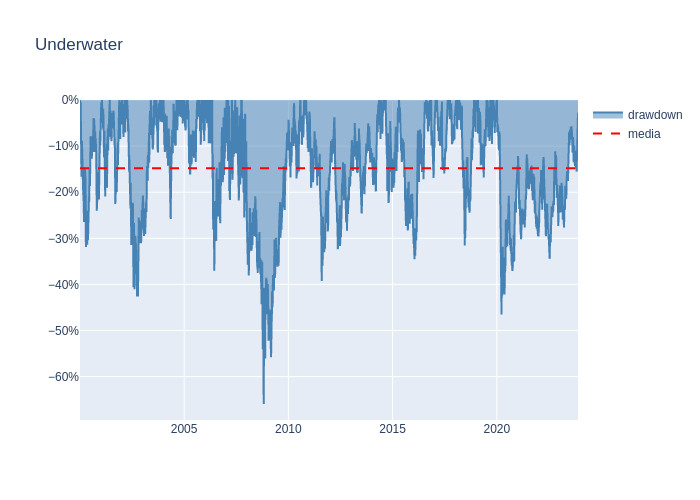

In [231]:
df_cum_rets = (retornos['r_'+codigo]+1).cumprod()
running_max = np.maximum.accumulate(df_cum_rets)
underwater = (df_cum_rets-running_max) / running_max
trace1 = go.Scatter(x=underwater.index,y=underwater, name = 'drawdown',line=dict(color='steelblue'), fill='tozeroy')

df_cum_rets_mean = -underwater.mean()
trace2 = go.Scatter(x=[min(underwater.index),max(underwater.index)],y=[-df_cum_rets_mean,-df_cum_rets_mean],
                    mode='lines',name = 'media',line=dict(color='red', width=2, dash='dash'))

layout = go.Layout(title='Underwater',showlegend=True)
fig = go.Figure(data=[trace1,trace2], layout=layout)
fig.layout.yaxis.tickformat = '.0%'

fig.show()

### correlação dos retornos com ativos do índice amplo

In [182]:
IBr50_rtrns = pd.DataFrame()
if codigo in IBr50 : IBr50_rtrns = IBr50_preco.pct_change()
else :
  IBr50_rtrns = (IBr50_preco.pct_change()).join(retornos['r_'+codigo],how='inner')
  IBr50_rtrns.rename(columns={'r_'+codigo : codigo+'.SA'}, inplace=True)
IBr50_rtrns.dropna(inplace=True)
#m=IBr50_rtrns.corr()

In [183]:
data_corr = pd.DataFrame(IBr50_rtrns.corr().loc[codigo+'.SA'])

(no colab) clique na figura


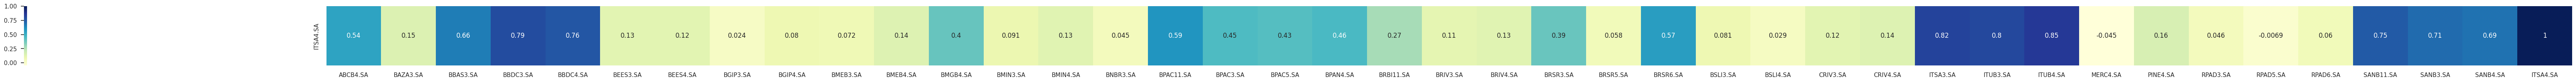

In [184]:
sns.set(rc = {'figure.figsize':(100,2)})
sns.heatmap(data_corr.T, annot = True, cmap = 'YlGnBu' , cbar_kws = dict(use_gridspec = False, location = "left"))
print('(no colab) clique na figura')

In [185]:
if usar_periodo :
  I50 = yf.download((pd.Series(IBr50)+'.SA').to_list(), period = periodo , actions=True , progress = False)
else :
  I50 = yf.download((pd.Series(IBr50)+'.SA').to_list(), start=inicio , end=termino , actions=True ,  progress = False)


In [186]:
I50_rtrns = (I50['Adj Close']).pct_change().dropna()

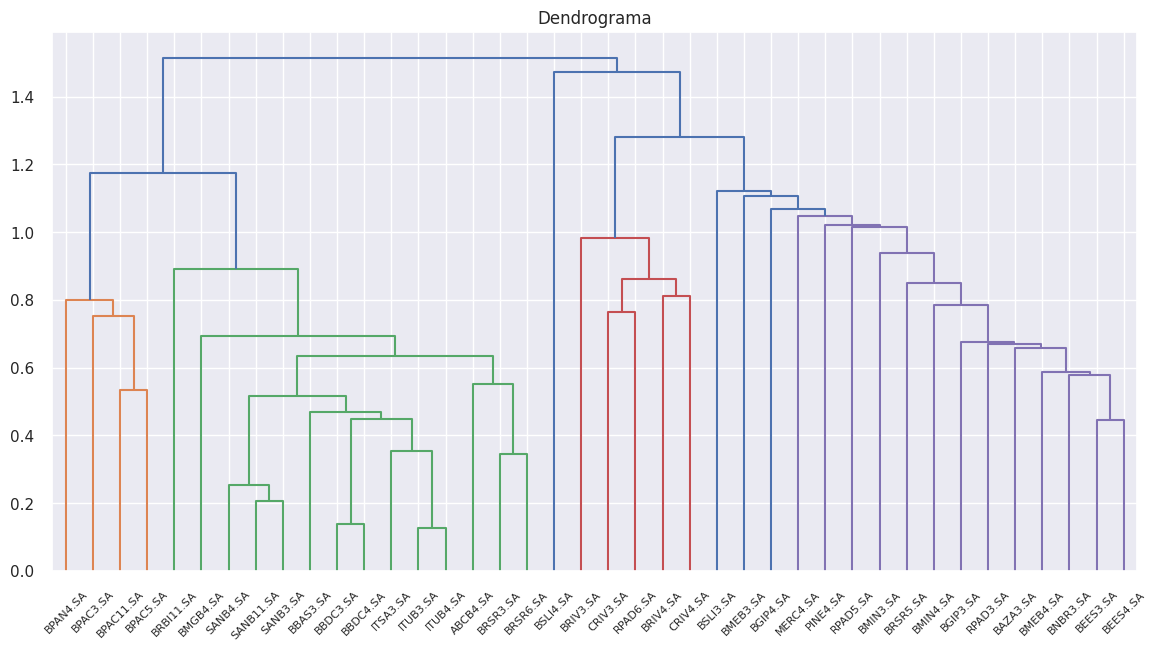

In [187]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(14, 7))
plt.title("Dendrograma")

clusters = shc.linkage(I50_rtrns.T, method='ward', metric='euclidean')

dendograma = shc.dendrogram(clusters, labels=I50_rtrns.columns)


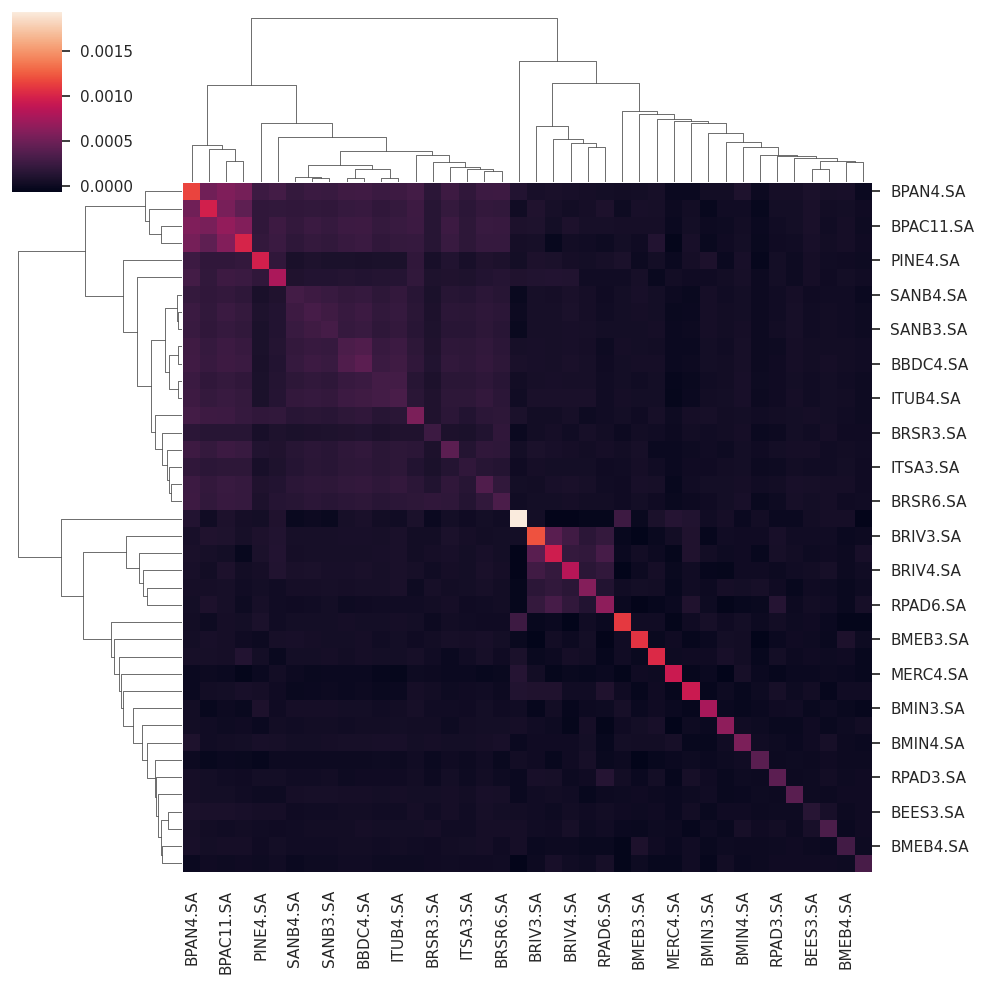

In [188]:
matriz_covarianca = I50_rtrns.cov()
dendograma = sns.clustermap(matriz_covarianca, method='ward', metric='euclidean')
colunas_seriation = dendograma.dendrogram_col.reordered_ind
colunas_seriation = I50_rtrns.columns[colunas_seriation]


### retorno esperado pelo CAPM



In [189]:
## o join garante a coincidencia da datas
capm_data = ((cdi.join(retornos['r_'+codigo])).join(retornos['r_ibov'])).dropna()
capm_data.head(2)

,cdi (% m),r_ITSA4,r_ibov
data,,,
2000-02-01,18.72,0.02353,0.008177
2000-03-01,18.70,0.00000,0.016591


In [190]:
X = capm_data['r_ibov'] - capm_data['cdi (% m)']     # excesso retorno ativo
y = capm_data['r_'+codigo] - capm_data['cdi (% m)']  # excesso retorno indice
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
_, beta = result.params

expected_return = capm_data['cdi (% m)'].mean() + beta*X.mean()
print("Retorno diário esperado: " + str(expected_return))
monthly_return = expected_return * 21
print("Retorno mensal esperado: " + str(monthly_return))
yearly_return = monthly_return * 12
print("Retorno anual esperado : " + str(yearly_return))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.142e+07
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:17:54   Log-Likelihood:                 434.19
No. Observations:                 170   AIC:                            -864.4
Df Residuals:                     168   BIC:                            -858.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.004      1.100      0.2

### hedge

A correlação entre os retornos é 0.62


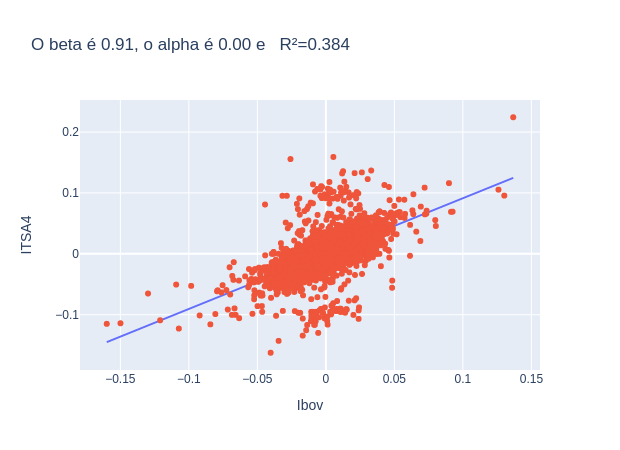

In [232]:
slope,intercept, r, pvalue, stderr = stats.linregress(x=retornos['r_ibov'], y=retornos['r_'+codigo])

print(f'A correlação entre os retornos é {r:.2f}')

line_x = np.linspace(retornos['lr_ibov'].min(), retornos['lr_ibov'].max(),100)
line_y = slope*line_x + intercept

trace1 = go.Scatter(x = line_x,y = line_y, mode = 'lines' )

trace2 = go.Scatter(x = retornos['lr_ibov'], y=retornos['lr_'+codigo] , mode ='markers')

layout = dict(title = f'O beta é {slope:.2f}, o alpha é {intercept:.2f} e   R²={r**2:.3f}',
              xaxis_title="Ibov",
              yaxis_title=codigo,
              height = 450,width = 620,
              showlegend=False,
              font = dict(size = 12),    )

data_trace = [trace1,trace2]

fig = go.Figure(data=data_trace , layout=layout)

fig.show()

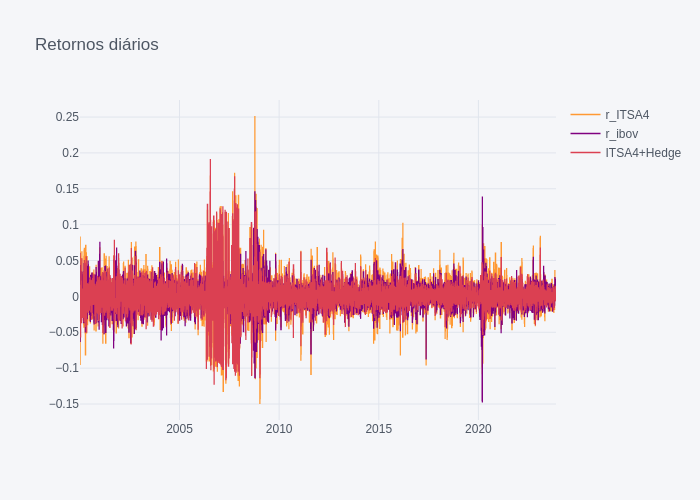

In [233]:
# beta hedge
"""
Os gerentes de carteiras projetam modelos de fatores que lhes dizem como equilIBr50r um portfólio para obter alfa.
Como alfa é como os gerentes são pagos, eles só querem exposição a seus fatores.
A cobertura beta remove a parte dos retornos impulsionados pelo mercado e deixa apenas os retornos impulsionados pelos fatores.
"""


retornos[codigo+"+Hedge"] = -1 * slope * retornos['r_ibov']+ retornos['r_'+codigo]
retornos.iplot(   keys = ['r_'+codigo,'r_ibov',codigo+"+Hedge"],
                  colors=['orange','purple', 'red'],
                  title='Retornos diários' )


In [193]:
P = retornos[codigo+"+Hedge"].values
X = retornos['r_ibov'].values
alpha,beta,_,_,_ = stats.linregress(X, P)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: -2.275901070821708e-17
Beta: 0.0004029186529614057


#Volatilidade

##Volatilidade Condicional

Garch(1,1): a variância condicional é $\sigma_n^2 = \omega + \alpha r_{n-1}^2 + \beta\sigma_{n-1}^2 $, as letras gregas são parâmetros estimados (por máx. verossimilhamça) do modelo, $r$ é retorno e $\sigma^2$ variância.  Os parâmetros:  $\omega = (1-\alpha-\beta)\cdot(\text{var de longo prazo})$, que é uma "reversão a média": $\sigma_{\infty}^2\to \text{VLP}$ com velocidade $1-\alpha-\beta$; $\alpha$ é o peso dos retornos  mais recentes, desde que $\alpha,\beta,\omega\geq 0$ e $\alpha+\beta<1$; $\beta$ é velocidade do  decaimento para as volatilidades mais recentes.

Quando $\omega=0,\alpha=1-\lambda, \beta=\lambda$ é o ewma: $ (1-\lambda) r_{n-1}^2 + \lambda \sigma_{n-1}^2$


In [194]:
#@title ####   EWMA
#@markdown fator de decaimento para ewma:
Lambda=0.94 #@param {type:"number"}


In [195]:
ewma = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
ewma['vol'].iloc[0] = np.sqrt((retornos['r_'+codigo][0:4]**2).sum())
for t in range(1,len(retornos['r_'+codigo])):
    ewma.iloc[t] = np.sqrt((1-Lambda)*retornos['r_'+codigo].iloc[t-1]**2 + Lambda*ewma.iloc[t-1]**2)
ewma.tail(3)

,vol
Date,
2023-11-21,0.014222
2023-11-22,0.013788
2023-11-23,0.013405


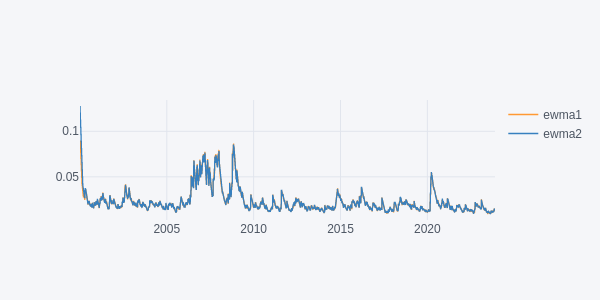

In [234]:
#########
tmp=pd.DataFrame()
tmp['ewma1'] = (retornos['r_'+codigo].ewm(alpha = 0.06, min_periods=4, adjust=False).std()).shift(1)
tmp['ewma2'] = ewma['vol']
tmp.iplot(dimensions=(600,300))
##########

In [197]:
#@title ####   GARCH(1,1)

!pip install -q arch
import scipy.optimize as spop

def garch_mle(params):
    mu    = params[0]
    omega = params[1]
    alpha = params[2]
    beta  = params[3]
    #variancia de longo prazo
    long_var =  (omega/(1 - alpha - beta))
    #volatilidade de longo prazo
    long_run = np.sqrt(long_var*252)
    #volatilidade condicional
    resid = retornos['lr_'+codigo] - mu
    realised = abs(resid)
    conditional = np.zeros(len(retornos['r_'+codigo]))
    conditional[0] =  long_run
    # GARCH
    for t in range(1,len(retornos['lr_'+codigo])):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    # np.log-verossimilhança
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    np.log_likelihood = np.sum(np.log(likelihood))
    return -np.log_likelihood
### grach parametros
# maximização  np.log-verossimilhança
res = spop.minimize(garch_mle , [r_media, r_variancia, 0, 0  ], method='Nelder-Mead')

params = res.x
G_mu     = res.x[0]
G_omega  = res.x[1]
G_alpha  = res.x[2]
G_beta   = res.x[3]
np.log_likelihood = -float(res.fun)
#print('np.log-verossim. '+str(round(np.log_likelihood, 4)))
###############################

print('Parâmetros do GARCH encontrados:')
print('mu '+str(round(G_mu, 6)))
print('omega '+str(round(G_omega, 6)))
print('alpha '+str(round(G_alpha, 6)))
print('beta  '+str(round(G_beta, 6)))


Parâmetros do GARCH encontrados:
mu 0.000992
omega 1.2e-05
alpha 0.089859
beta  0.884156


In [198]:
long_run = (G_omega/(1 - G_alpha - G_beta))**(1/2)
G_resid = retornos['lr_'+codigo] - G_mu

conditional = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
conditional['vol'].iloc[0] = long_run
for t in range(1,len(retornos['lr_'+codigo])):
    conditional['vol'].iloc[t] = (G_omega + G_alpha*G_resid.iloc[t-1]**2 + G_beta*conditional.iloc[t-1]**2)**(1/2)
conditional.tail(3)

,vol
Date,
2023-11-21,0.016038
2023-11-22,0.015483
2023-11-23,0.015049


In [199]:
print('VOLATILIDADE:')
print('volatilidade diária de longo prazo '+str(round(long_run, 6)*100)+'%')
print('volatilidade de longo prazo anualizada '+str(round(long_run*np.sqrt(252), 6)*100)+'%')
print(' ')

VOLATILIDADE:
volatilidade diária de longo prazo 2.1694%
volatilidade de longo prazo anualizada 34.4383%
 


In [200]:
from arch import arch_model
model = arch_model(retornos['lr_'+codigo],vol='GARCH', p=1, q=1)
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               lr_ITSA4   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                14408.6
Distribution:                  Normal   AIC:                          -28809.1
Method:            Maximum Likelihood   BIC:                          -28782.4
                                        No. Observations:                 5915
Date:                Thu, Nov 23 2023   Df Residuals:                     5914
Time:                        20:18:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.6940e-04  2.468e-04      3.928  8.563e-05 [4.

In [201]:
#%matplotlib inline
# fig=model_fitted.plot();

In [202]:
model_forecast = model_fitted.forecast(horizon=5)
model_forecast.variance[-1:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-11-23,0.000224,0.000233,0.000241,0.000249,0.000258


In [203]:
model_vol = model_forecast.variance[-1:] **0.5
model_vol[-1:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-11-23,0.014961,0.015249,0.015525,0.015791,0.016047


In [204]:
model_vol_anual =  (model_forecast.variance[-1:] * 252) **0.5
model_vol_anual

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-11-23,0.237505,0.242064,0.24645,0.250673,0.254745


In [205]:
# compara=pd.DataFrame()
# compara['garch'] = retornos['lr_VALE3'].rolling(252).apply(garch_anual,raw=True)
# compara['dp']

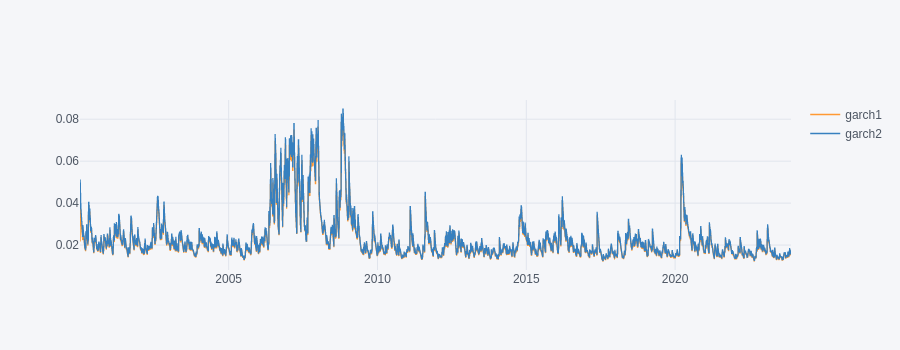

In [235]:
#########
tmp=pd.DataFrame()
tmp['garch1'] = conditional['vol']                      # manual
tmp['garch2'] = model_fitted.conditional_volatility     # pacote
tmp.iplot(dimensions=(900,350))
##########

In [207]:
vols = pd.DataFrame(columns=['ewma' , 'dp' , 'garch(1,1)' , 'longo prazo' , 'g-model'] , index = retornos.index)
vols['ewma'] = ewma['vol']
vols['dp'] = r_desviopadrao
vols['garch(1,1)'] = conditional['vol']
vols['longo prazo'] = long_run
vols['g-model']=model_fitted.conditional_volatility

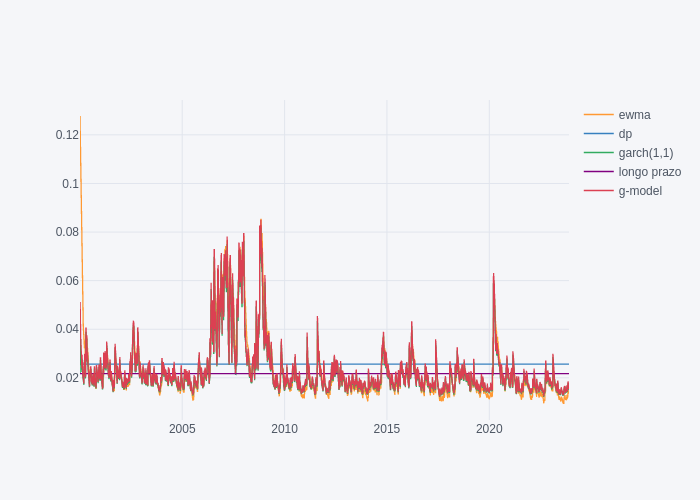

In [236]:
vols.iplot()

In [209]:
vols.round(decimals=3).iloc[::-1].head(3)

,ewma,dp,"garch(1,1)",longo prazo,g-model
Date,,,,,
2023-11-23,0.013,0.026,0.015,0.022,0.015
2023-11-22,0.014,0.026,0.015,0.022,0.016
2023-11-21,0.014,0.026,0.016,0.022,0.017


# Futuros


In [210]:
#@markdown carrega dados
url1 = 'https://www.tradergrafico.com.br/opcoes/'
#ptra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
#junta com a requests
r1 = requests.get(url1, headers=header)
# read_html do pandas põe a tabela num dataframe
dfs = pd.read_html(r1.text, decimal=',', thousands='.')[0]
dfs = dfs.rename(columns={0:'Ativo Obj' , 1:'Código' , 2:'Tipo' , 3:'Exercício (R$)' , 4: 'Último Fechamento' , 5:'Vencimento' , 6:'Modelo'})
dfs = dfs.drop(labels=0, axis=0)
dfs.dropna(axis = 0, how = 'all', inplace = True)
dfs['Ativo Obj'].fillna(method='ffill',inplace=True)
dfs[dfs['Ativo Obj']==codigo].style.hide_index()

Ativo Obj,Código,Tipo,Exercício (R$),Último Fechamento,Vencimento,Modelo
ITSA4,ITSAA100,Call,"PN 8,54","R$ 1,85",19/01/2024,Americana
ITSA4,ITSAA110,Call,"PN 9,45","R$ 0,78",19/01/2024,Americana
ITSA4,ITSAA120,Call,"PN 10,36","R$ 0,19",19/01/2024,Americana
ITSA4,ITSAA130,Call,"PN 11,27","R$ 0,03",19/01/2024,Americana
ITSA4,ITSAB870,Call,"PN 8,45","R$ 1,84",16/02/2024,Europeia
ITSA4,ITSAB990,Call,"PN 9,65","R$ 0,84",16/02/2024,Europeia
ITSA4,ITSAC88,Call,"PN 8,62","R$ 2,65",21/03/2025,Europeia
ITSA4,ITSAD100,Call,"PN 8,54","R$ 1,89",19/04/2024,Americana
ITSA4,ITSAD900,Call,"PN 7,63","R$ 2,80",19/04/2024,Americana
ITSA4,ITSAH141,Call,"PN 12,42","R$ 0,16",16/08/2024,Europeia


## Preço das opções por BS


Preço da Call $ = SN(d_1) - K e^{-rt}N(d_2)$ e

Preço da Put $ = Ke^{-rt}N(-d_2)-SN(-d_1)$

$d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})t}{\sigma \cdot \sqrt{t}}$
e $d_2 = d_1 - \sigma \cdot \sqrt{t}$

S = Preço atual da ação; K = Preço de Strike; r = Taxa livre de risco (com capitalização composta);
σ =Variância (anual) do retorno contínuo da ação; t = Prazo (em anos) até a data de vencimento;
N(d) = Probabilidade de que uma variável aleatória padronizada e com distribuição normal, seja menor ou igual a d


In [211]:
def call_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*stats.norm.cdf(d1)-E*np.exp(-rf*T)*stats.norm.cdf(d2)


def put_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S*stats.norm.cdf(-d1)+E*np.exp(-rf*T)*stats.norm.cdf(-d2)


In [212]:
url_bcb_selic= f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=csv"
selic = pd.read_csv(url_bcb_selic, sep=';', decimal=',')
selic['data'] = pd.to_datetime(selic['data'], dayfirst=True)
selic.set_index('data', inplace=True)
selic.rename(columns={'valor': 'selic'}, inplace=True)
selic.tail()#[selic.index>retornos.index[0]]

,selic
data,
2023-12-09,12.25
2023-12-10,12.25
2023-12-11,12.25
2023-12-12,12.25
2023-12-13,12.25


In [213]:
#data
vencimento = "2023-12-15"    #@param {type:"date"}
venc= datetime.strptime(vencimento, '%Y-%m-%d')

hoje= preco.index[-1]
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
# taxa livre risco
r =  np.log((selic.iloc[-1]/100).values[0]+1)
# preço
S = preco[codigo].iloc[-1]
# volatilidade
sigma = vols['dp'].iloc[-1]*np.sqrt(252)
sigma = vols['g-model'].iloc[-1]*np.sqrt(252)


preços teóricos para 'vencimento'

In [214]:
# strikes

mm = ( preco[codigo][-21:-1].dropna()).mean()  #preço médio
ss = ( preco[codigo][-21:-1].dropna()).std()   #dp do preço
Ss= mm-3*ss
Sa= mm-2*ss
Sb= mm-1*ss
Sc= mm+1*ss
Sd= mm+2*ss
Se= mm+3*ss



bs_data = [
    [ '{:0.2f}'.format(Ss) , round(call_option_price(S,Ss, t, r, sigma),2)  ,round(put_option_price(S,Ss, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sa) , round(call_option_price(S,Sa, t, r, sigma),2)  ,round(put_option_price(S,Sa, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sb) , round(call_option_price(S,Sb, t, r, sigma),2)  ,round(put_option_price(S,Sb, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(mm) , round(call_option_price(S,mm, t, r, sigma),2)  ,round(put_option_price(S,mm, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(S)  , round(call_option_price(S,S , t, r, sigma),2)  ,round(put_option_price(S ,S, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sc) , round(call_option_price(S,Sc, t, r, sigma),2)  ,round(put_option_price(S,Sc, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sd) , round(call_option_price(S,Sd, t, r, sigma),2)  ,round(put_option_price(S,Sd, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Se) , round(call_option_price(S,Se, t, r, sigma),2)  ,round(put_option_price(S,Se, t, r, sigma),2) ]
]


BS = pd.DataFrame(bs_data , columns=['preço '+codigo, 'preço Call' , 'preço Put'] )
BS.style.hide_index()

preço ITSA4,preço Call,preço Put
7.83,2.160000,0.000000
8.31,1.690000,0.000000
8.79,1.220000,0.000000
9.27,0.770000,0.030000
9.94,0.280000,0.210000
9.75,0.400000,0.130000
10.22,0.160000,0.370000
10.70,0.050000,0.730000


In [215]:
#@markdown preço teórico a partir de outros parâmetros
#@markdown usando BS e Monte Carlo

# preço
S=9.92 #@param {type:"number"}
print('preço  do ativo',S)

# data
vencimento = "2023-12-15"    #@param {type:"date"}
hoje= preco.index[-1]
venc= datetime.strptime(vencimento, '%Y-%m-%d')
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
print("vencimento em "+str(res)+" dias (",t,"anos)")

# strike
strike=10.52  #@param {type:"number"}

# selic
juros = 12.25 #@param {type:"number"}
r=np.log(juros/100+1)
# vol
volatilidade ='EWMA'  #@param ['GARCH' , 'EWMA' ,'Desvio Padrao' ]

if volatilidade == 'GARCH'  :
	sigma = vols['g-model'].iloc[-1]*np.sqrt(252)
elif volatilidade == 'EWMA' :
	sigma = vols['ewma'].iloc[-1]*np.sqrt(252)
else : sigma = vols['ewma'].iloc[-1]*np.sqrt(252)

print("Preços dos derivativos pelo modelo Black-Scholes")
print("Call: ", round(call_option_price(S, strike, t, r, sigma),2))
print("Put: ", round(put_option_price(S, strike, t, r, sigma),2))


preço  do ativo 9.92
vencimento em 16 dias ( 0.06349206349206349 anos)
Preços dos derivativos pelo modelo Black-Scholes
Call:  0.05
Put:  0.57


In [216]:
# Monte Carlo
def call_option_simulation(S0,E,T,rf,sigma,iterations):
	option_data = np.zeros([iterations, 2])
	rand = np.random.normal(0, 1, [1, iterations])
	#equation for the S(t) stock price
	stock_price = S0*np.exp(T*(r - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
	#we need S-E because we have to calculate the max(S-E,0)
	option_data[:,1] = stock_price - E
	#average for the Monte-Carlo method
	#np.amax() returns the max(0,S-E) according to the formula
	average = np.sum(np.amax(option_data, axis=1))/float(iterations)
	#have to use the np.exp(-rT) discount factor
	return np.exp(-1.0*rf*T)*average

def put_option_simulation(S0,E,T,rf,sigma,iterations):
 option_data = np.zeros([iterations, 2])
 rand = np.random.normal(0, 1, [1, iterations])
 stock_price = S0*np.exp(T*(rf - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
 option_data[:,1] = E - stock_price
 average = np.sum(np.amax(option_data, axis=1))/float(iterations)
 return np.exp(-1.0*rf*T)*average


rodadas = 1000	#number of iterations in the Monte-Carlo simulation


print("Preços dos derivativos por simulação Monte Carlo")
print("Call: ", round(call_option_simulation(S,strike,t,r,sigma,rodadas),2))
print("Put: ", round(put_option_simulation(S,strike,t,r,sigma,rodadas),2))

Preços dos derivativos por simulação Monte Carlo
Call:  0.05
Put:  0.59
